<a href="https://colab.research.google.com/github/Solenoidhelix/FinalYearProject/blob/main/Seniment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup


In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 8.9 MB/s 
     |████████████████████████████████| 880 kB 49.0 MB/s 
     |████████████████████████████████| 6.6 MB 38.7 MB/s 
     |████████████████████████████████| 77 kB 6.4 MB/s 
     |████████████████████████████████| 596 kB 67.4 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=b9b779e495f19a068760b6f020fbf960a04178e29b55339cb41e8eaf718b1793
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import transformers
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.special import softmax
import csv
import urllib.request

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [ ]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

#Brain Health Sentiment

In [ ]:
datafile = open('Brain full.csv', 'r')
myreader = csv.reader(datafile)

In [ ]:
#Read file
negative=0
neutral=0
positive=0
#Open to write to new file
with open('Brain.csv', 'w') as new_file:
      csv_writer = csv.writer(new_file)
      for row in myreader:     

        #Apply tokenizer on response
        encoded_input = tokenizer(row[19], return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        ranking = np.argsort(scores)
        ranking = ranking[::-1]

        #Get highest ranking
        for i in range(scores.shape[0]):
          l = labels[ranking[i]]
          s = scores[ranking[i]]  
          break 

        #Get number of negative/neutral/positive
        if l == 'negative':
          negative = negative+1
        elif l == 'neutral':         
          neutral = neutral+1
        else:
          positive = positive+1

        #Write responses row to new file and append sentiment to the end of column
        csv_writer.writerow(row+[l]) 

print("Negative:",negative)
print("Neutral",neutral)
print("Positive",positive)

Negative: 955
Neutral 156
Positive 13


#Brain health correlation to geggg

In [ ]:
datafile = open('Brain.csv', 'r')
myreader = csv.reader(datafile)
ggez = np.array([[0,0,0],
                            [0,0,0],
                            [0,0,0],
                            [0,0,0],
                            [0,0,0]])

for row in myreader:
  if row[10] == '1':
    if row[23] == 'negative':
      ggez[0,0] = ggez[0,0]+1
    elif row[23] == 'neutral':         
      ggez[0,1] = ggez[0,1]+1
    else:
      ggez[0,2] = ggez[0,2]+1
  if row[10] == '2':
    if row[23] == 'negative':
     ggez[1,0] = ggez[1,0]+1
    elif row[23] == 'neutral':         
      ggez[1,1] = ggez[1,1]+1
    else:
      ggez[1,2] = ggez[1,2]+1
  if row[10] == '3':
    if row[23] == 'negative':
      ggez[2,0] = ggez[2,0]+1
    elif row[23] == 'neutral':         
      ggez[2,1] = ggez[2,1]+1
    else:
      ggez[2,2] = ggez[2,2]+1
  if row[10] == '4':
    if row[23] == 'negative':
      ggez[3,0] = ggez[3,0]+1
    elif row[23] == 'neutral':         
      ggez[3,1] = ggez[3,1]+1
    else:
      ggez[3,2] = ggez[3,2]+1
  if row[10] == '5':
    if row[23] == 'negative':
      ggez[4,0] = ggez[4,0]+1
    elif row[23] == 'neutral':         
      ggez[4,1] = ggez[4,1]+1
    else:
      ggez[4,2] = ggez[4,2]+1

print(ggez)

[[381  59   6]
 [114  16   0]
 [167  27   2]
 [221  41   2]
 [  0   0   0]]


##Plot

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

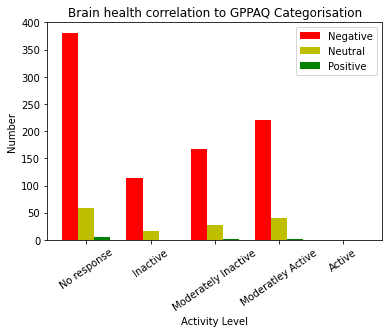

In [ ]:
N = 5
ind = np.arange(N) 
width = 0.25
  
data0 = [ggez[0,0],
         ggez[1,0],
         ggez[2,0],
         ggez[3,0],
         ggez[4,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [ggez[0,1],
         ggez[1,1], 
         ggez[2,1],
         ggez[3,1],
         ggez[4,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [ggez[0,2], 
         ggez[1,2], 
         ggez[2,2], 
         ggez[3,2], 
         ggez[4,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'g')
  
plt.xlabel("Activity Level")
plt.ylabel('Number')
plt.title("Brain health correlation to GPPAQ Categorisation")
  
plt.xticks(ind+width,['No response','Inactive','Moderately Inactive', 'Moderatley Active','Active'])
plt.xticks(rotation=35)
plt.legend( (bar1, bar2, bar3), ('Negative', 'Neutral', 'Positive') )
plt.show()

NameError: ignored

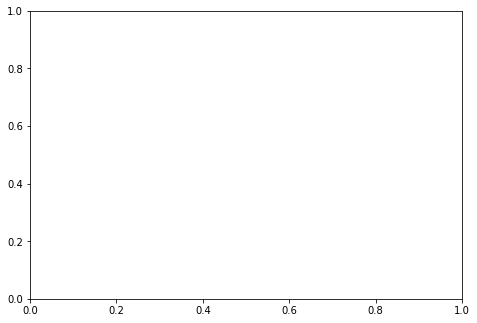

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_age[0,0], brain_corr_age[0,1], brain_corr_age[0,2]]
plt.title('Brain health sentiment age:16-39')
ax.bar(x,y2)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_age[1,0], brain_corr_age[1,1], brain_corr_age[1,2]]
plt.title('Brain health sentiment age:40-49')
ax.bar(x,y2)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y3 = [brain_corr_age[2,0], brain_corr_age[2,1], brain_corr_age[2,2]]
plt.title('Brain health sentiment age:50-65')
ax.bar(x,y3)
plt.show()


In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y4 = [brain_corr_age[3,0], brain_corr_age[3,1], brain_corr_age[3,2]]
plt.title('Brain health sentiment age:66-74')
ax.bar(x,y4)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y5 = [brain_corr_age[4,0], brain_corr_age[4,1], brain_corr_age[4,2]]
plt.title('Brain health sentiment age:75+')
ax.bar(x,y5)
plt.show()


#Brain health correlation to age

In [ ]:
datafile = open('Brain.csv', 'r')
myreader = csv.reader(datafile)
brain_corr_age = np.array([[0,0,0],
                            [0,0,0],
                            [0,0,0],
                            [0,0,0],
                            [0,0,0]])

for row in myreader:
  if row[4] == '1':
    if row[23] == 'negative':
      brain_corr_age[0,0] = brain_corr_age[0,0]+1
    elif row[23] == 'neutral':         
      brain_corr_age[0,1] = brain_corr_age[0,1]+1
    else:
      brain_corr_age[0,2] = brain_corr_age[0,2]+1
  if row[4] == '2':
    if row[23] == 'negative':
     brain_corr_age[1,0] = brain_corr_age[1,0]+1
    elif row[23] == 'neutral':         
      brain_corr_age[1,1] = brain_corr_age[1,1]+1
    else:
      brain_corr_age[1,2] = brain_corr_age[1,2]+1
  if row[4] == '3':
    if row[23] == 'negative':
      brain_corr_age[2,0] = brain_corr_age[2,0]+1
    elif row[23] == 'neutral':         
      brain_corr_age[2,1] = brain_corr_age[2,1]+1
    else:
      brain_corr_age[2,2] = brain_corr_age[2,2]+1
  if row[4] == '4':
    if row[23] == 'negative':
      brain_corr_age[3,0] = brain_corr_age[3,0]+1
    elif row[23] == 'neutral':         
      brain_corr_age[3,1] = brain_corr_age[3,1]+1
    else:
      brain_corr_age[3,2] = brain_corr_age[3,2]+1
  if row[4] == '5':
    if row[23] == 'negative':
      brain_corr_age[4,0] = brain_corr_age[4,0]+1
    elif row[23] == 'neutral':         
      brain_corr_age[4,1] = brain_corr_age[4,1]+1
    else:
      brain_corr_age[4,2] = brain_corr_age[4,2]+1

print(brain_corr_age)

[[  0   0   0]
 [ 77  16   1]
 [456  78   9]
 [314  44   3]
 [108  18   0]]


##Plot

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

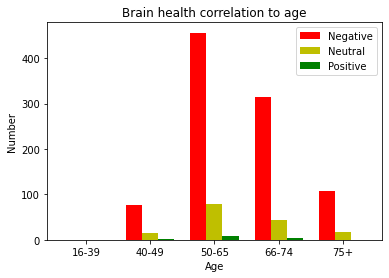

In [ ]:
N = 5
ind = np.arange(N) 
width = 0.25
  
data0 = [brain_corr_age[0,0],
         brain_corr_age[1,0],
         brain_corr_age[2,0],
         brain_corr_age[3,0],
         brain_corr_age[4,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [brain_corr_age[0,1],
         brain_corr_age[1,1], 
         brain_corr_age[2,1],
         brain_corr_age[3,1],
         brain_corr_age[4,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [brain_corr_age[0,2], 
         brain_corr_age[1,2], 
         brain_corr_age[2,2], 
         brain_corr_age[3,2], 
         brain_corr_age[4,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'g')
  
plt.xlabel("Age")
plt.ylabel('Number')
plt.title("Brain health correlation to age")
  
plt.xticks(ind+width,['16-39','40-49','50-65', '66-74','75+'])
plt.legend( (bar1, bar2, bar3), ('Negative', 'Neutral', 'Positive') )
plt.show()

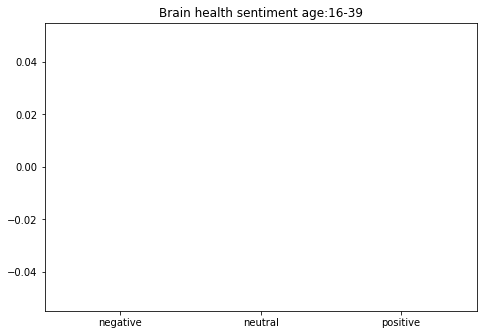

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_age[0,0], brain_corr_age[0,1], brain_corr_age[0,2]]
plt.title('Brain health sentiment age:16-39')
ax.bar(x,y2)
plt.show()

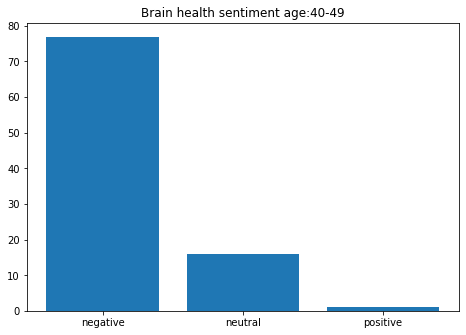

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_age[1,0], brain_corr_age[1,1], brain_corr_age[1,2]]
plt.title('Brain health sentiment age:40-49')
ax.bar(x,y2)
plt.show()

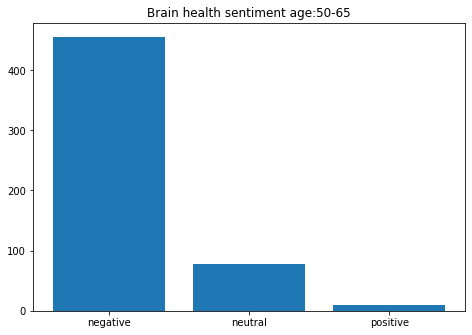

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y3 = [brain_corr_age[2,0], brain_corr_age[2,1], brain_corr_age[2,2]]
plt.title('Brain health sentiment age:50-65')
ax.bar(x,y3)
plt.show()


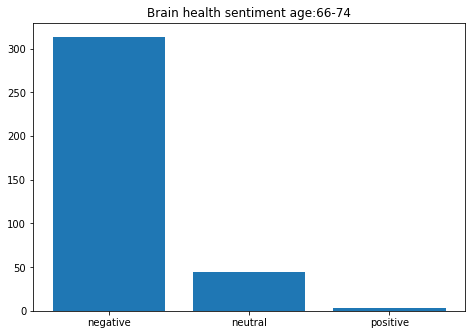

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y4 = [brain_corr_age[3,0], brain_corr_age[3,1], brain_corr_age[3,2]]
plt.title('Brain health sentiment age:66-74')
ax.bar(x,y4)
plt.show()

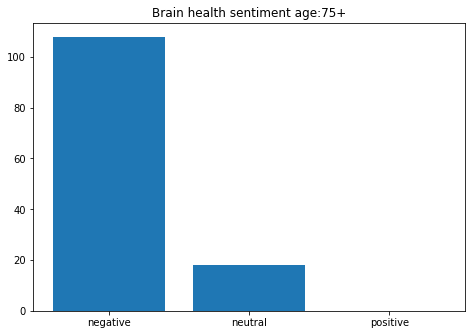

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y5 = [brain_corr_age[4,0], brain_corr_age[4,1], brain_corr_age[4,2]]
plt.title('Brain health sentiment age:75+')
ax.bar(x,y5)
plt.show()


#Brain health correlation to country

In [ ]:
datafile = open('Brain.csv', 'r')
myreader = csv.reader(datafile)
brain_corr_country = np.array([[2,2,2],
                              [0,0,0],
                              [0,0,0],
                              [0,0,0],
                              [0,0,0]])
for row in myreader:
  if row[5] == '1':
    if row[23] == 'negative':
      brain_corr_country[0,0] = brain_corr_country[0,0]+1
    elif row[23] == 'neutral':         
      brain_corr_country[0,1] = brain_corr_country[0,1]+1
    else:
      brain_corr_country[0,2] = brain_corr_country[0,2]+1
  if row[5] == '2':
    if row[23] == 'negative':
     brain_corr_country[1,0] = brain_corr_country[1,0]+1
    elif row[23] == 'neutral':         
      brain_corr_country[1,1] = brain_corr_country[1,1]+1
    else:
      brain_corr_country[1,2] = brain_corr_country[1,2]+1
  if row[5] == '3':
    if row[23] == 'negative':
      brain_corr_country[2,0] = brain_corr_country[2,0]+1
    elif row[23] == 'neutral':         
      brain_corr_country[2,1] = brain_corr_country[2,1]+1
    else:
      brain_corr_country[2,2] = brain_corr_country[2,2]+1
  if row[5] == '4':
    if row[23] == 'negative':
      brain_corr_country[3,0] = brain_corr_country[3,0]+1
    elif row[23] == 'neutral':         
      brain_corr_country[3,1] = brain_corr_country[3,1]+1
    else:
      brain_corr_country[3,2] = brain_corr_country[3,2]+1
  if row[5] == '5':
    if row[23] == 'negative':
      brain_corr_country[4,0] = brain_corr_country[4,0]+1
    elif row[23] == 'neutral':         
      brain_corr_country[4,1] = brain_corr_country[4,1]+1
    else:
      brain_corr_country[4,2] = brain_corr_country[4,2]+1


In [ ]:
print(brain_corr_country)

[[ 99  27   2]
 [220  28   3]
 [121  20   3]
 [501  80   7]
 [ 16   3   0]]


##Plot

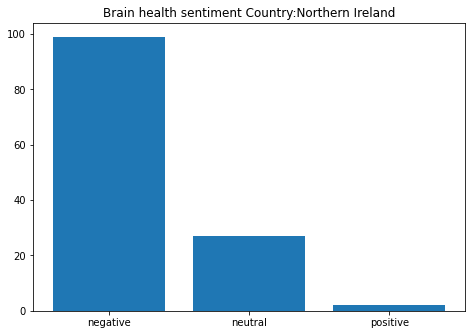

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_country[0,0], brain_corr_country[0,1], brain_corr_country[0,2]]
plt.title('Brain health sentiment Country:Northern Ireland')
ax.bar(x,y2)
plt.show()

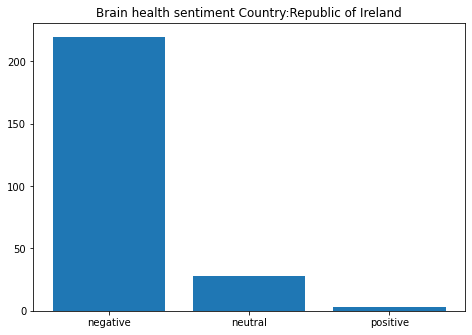

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_country[1,0], brain_corr_country[1,1], brain_corr_country[1,2]]
plt.title('Brain health sentiment Country:Republic of Ireland')
ax.bar(x,y2)
plt.show()

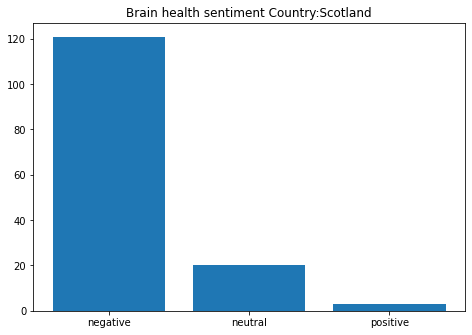

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_country[2,0], brain_corr_country[2,1], brain_corr_country[2,2]]
plt.title('Brain health sentiment Country:Scotland')
ax.bar(x,y2)
plt.show()

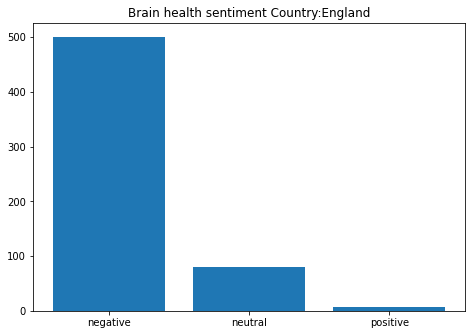

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_country[3,0], brain_corr_country[3,1], brain_corr_country[3,2]]
plt.title('Brain health sentiment Country:England')
ax.bar(x,y2)
plt.show()

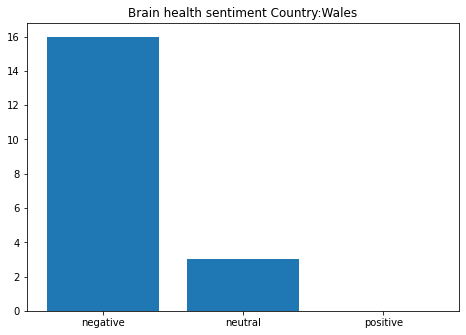

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_country[4,0], brain_corr_country[4,1], brain_corr_country[4,2]]
plt.title('Brain health sentiment Country:Wales')
ax.bar(x,y2)
plt.show()

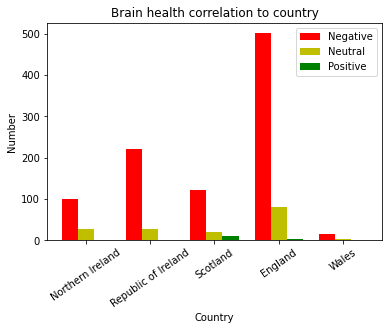

In [ ]:
N = 5
ind = np.arange(N) 
width = 0.25
  
data0 = [brain_corr_country[0,0],
         brain_corr_country[1,0],
         brain_corr_country[2,0],
         brain_corr_country[3,0],
         brain_corr_country[4,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [brain_corr_country[0,1],
         brain_corr_country[1,1], 
         brain_corr_country[2,1],
         brain_corr_country[3,1],
         brain_corr_country[4,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [brain_corr_age[0,2], 
         brain_corr_age[1,2], 
         brain_corr_age[2,2], 
         brain_corr_age[3,2], 
         brain_corr_age[4,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'g')
  
plt.xlabel("Country")
plt.ylabel('Number')
plt.title("Brain health correlation to country")
  
plt.xticks(ind+width,['Northern Ireland','Republic of Ireland','Scotland', 'England','Wales'])
plt.xticks(rotation=35)
plt.legend( (bar1, bar2, bar3), ('Negative', 'Neutral', 'Positive') )
plt.show()


##Chi^2 Test

In [ ]:
stat, p, dof, expected = chi2_contingency(brain_corr_country)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.5
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=8
[[1.08403540e+02 1.78973451e+01 1.69911504e+00]
 [2.12572566e+02 3.50955752e+01 3.33185841e+00]
 [1.21953982e+02 2.01345133e+01 1.91150442e+00]
 [4.97978761e+02 8.22159292e+01 7.80530973e+00]
 [1.60911504e+01 2.65663717e+00 2.52212389e-01]]
probability=0.500, critical=7.344, stat=8.312
Dependent (reject H0)
significance=0.500, p=0.404
Dependent (reject H0)


#Brain health correlation to gender

In [ ]:
datafile = open('Brain.csv', 'r')
myreader = csv.reader(datafile)
brain_corr_gender = np.array([[0,0,0],
                              [0,0,0],
                              [0,0,0],
                              [0,0,0],])

for row in myreader:
  if row[6] == '1':
    if row[23] == 'negative':
      brain_corr_gender[0,0] = brain_corr_gender[0,0]+1
    elif row[23] == 'neutral':         
      brain_corr_gender[0,1] = brain_corr_gender[0,1]+1
    else:
      brain_corr_gender[0,2] = brain_corr_gender[0,2]+1
  if row[6] == '2':
    if row[23] == 'negative':
     brain_corr_gender[1,0] = brain_corr_gender[1,0]+1
    elif row[23] == 'neutral':         
      brain_corr_gender[1,1] = brain_corr_gender[1,1]+1
    else:
      brain_corr_gender[1,2] = brain_corr_gender[1,2]+1
  if row[6] == '3':
    if row[23] == 'negative':
      brain_corr_gender[2,0] = brain_corr_gender[2,0]+1
    elif row[23] == 'neutral':         
      brain_corr_gender[2,1] = brain_corr_gender[2,1]+1
    else:
      brain_corr_gender[2,2] = brain_corr_gender[2,2]+1
  if row[6] == '4' or row[6] == '0':
    if row[23] == 'negative':
      brain_corr_gender[3,0] = brain_corr_gender[3,0]+1
    elif row[23] == 'neutral':         
      brain_corr_gender[3,1] = brain_corr_gender[3,1]+1
    else:
      brain_corr_gender[3,2] = brain_corr_gender[3,2]+1

print(brain_corr_gender)

[[205  24   2]
 [742 131  10]
 [  0   0   0]
 [  8   1   1]]


##Plot

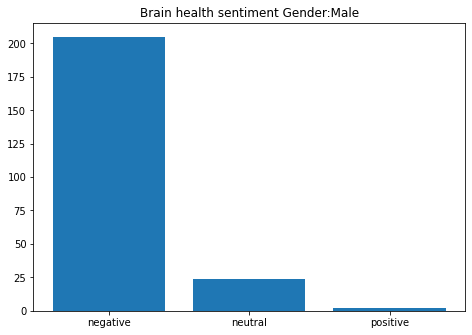

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_gender[0,0], brain_corr_gender[0,1], brain_corr_gender[0,2]]
plt.title('Brain health sentiment Gender:Male')
ax.bar(x,y2)
plt.show()

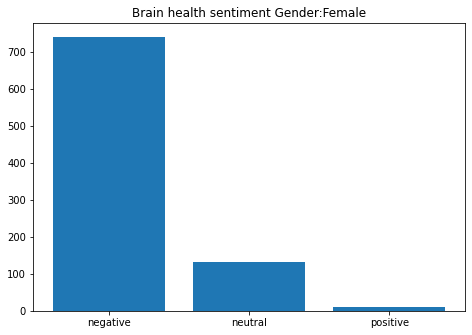

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_gender[1,0], brain_corr_gender[1,1], brain_corr_gender[1,2]]
plt.title('Brain health sentiment Gender:Female')
ax.bar(x,y2)
plt.show()

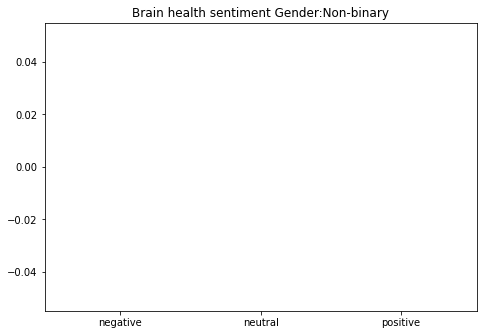

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_gender[2,0], brain_corr_gender[2,1], brain_corr_gender[2,2]]
plt.title('Brain health sentiment Gender:Non-binary')
ax.bar(x,y2)
plt.show()

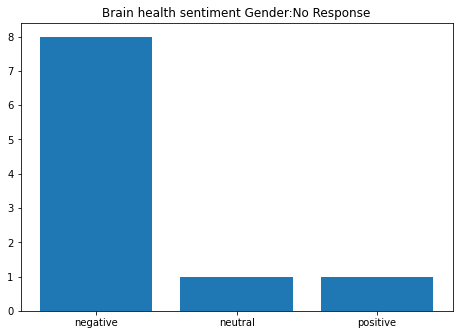

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_gender[3,0], brain_corr_gender[3,1], brain_corr_gender[3,2]]
plt.title('Brain health sentiment Gender:No Response')
ax.bar(x,y2)
plt.show()

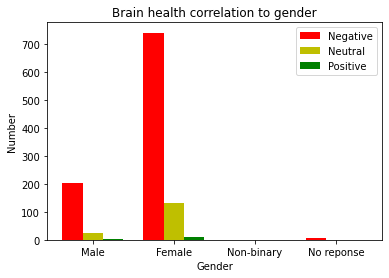

In [ ]:
N = 4
ind = np.arange(N) 
width = 0.25
  
data0 = [brain_corr_gender[0,0],
         brain_corr_gender[1,0],
         brain_corr_gender[2,0],
         brain_corr_gender[3,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [brain_corr_gender[0,1],
         brain_corr_gender[1,1], 
         brain_corr_gender[2,1],
         brain_corr_gender[3,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [brain_corr_gender[0,2], 
         brain_corr_gender[1,2], 
         brain_corr_gender[2,2], 
         brain_corr_gender[3,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'g')
  
plt.xlabel("Gender")
plt.ylabel('Number')
plt.title("Brain health correlation to gender")
  
plt.xticks(ind+width,['Male','Female','Non-binary','No reponse'])
plt.legend( (bar1, bar2, bar3), ('Negative', 'Neutral', 'Positive') )
plt.show()

#Brain health correlation to Ethnicity

In [ ]:
datafile = open('Brain.csv', 'r')
myreader = csv.reader(datafile)
brain_corr_ethnicity = np.array([[0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],])
for row in myreader:
  if row[7] == '1':
    if row[23] == 'negative':
      brain_corr_ethnicity[0,0] = brain_corr_ethnicity[0,0]+1
    elif row[23] == 'neutral':         
      brain_corr_ethnicity[0,1] = brain_corr_ethnicity[0,1]+1
    else:
      brain_corr_ethnicity[0,2] = brain_corr_ethnicity[0,2]+1
  if row[7] == '2':
    if row[23] == 'negative':
      brain_corr_ethnicity[1,0] = brain_corr_ethnicity[1,0]+1
    elif row[23] == 'neutral':         
      brain_corr_ethnicity[1,1] = brain_corr_ethnicity[1,1]+1
    else:
      brain_corr_ethnicity[1,2] = brain_corr_ethnicity[1,2]+1
  if row[7] == '3':
    if row[23] == 'negative':
      brain_corr_ethnicity[2,0] = brain_corr_ethnicity[2,0]+1
    elif row[23] == 'neutral':         
      brain_corr_ethnicity[2,1] = brain_corr_ethnicity[2,1]+1
    else:
      brain_corr_ethnicity[2,2] = brain_corr_ethnicity[2,2]+1
  if row[7] == '4':
    if row[23] == 'negative':
      brain_corr_ethnicity[3,0] = brain_corr_ethnicity[3,0]+1
    elif row[23] == 'neutral':         
      brain_corr_ethnicity[3,1] = brain_corr_ethnicity[3,1]+1
    else:
      brain_corr_ethnicity[3,2] = brain_corr_ethnicity[3,2]+1
  if row[7] == '5':
    if row[23] == 'negative':
      brain_corr_ethnicity[4,0] = brain_corr_ethnicity[4,0]+1
    elif row[23] == 'neutral':         
      brain_corr_ethnicity[4,1] = brain_corr_ethnicity[4,1]+1
    else:
      brain_corr_ethnicity[4,2] = brain_corr_ethnicity[4,2]+1
  if row[7] == '6':
    if row[23] == 'negative':
      brain_corr_ethnicity[5,0] = brain_corr_ethnicity[5,0]+1
    elif row[23] == 'neutral':         
      brain_corr_ethnicity[5,1] = brain_corr_ethnicity[5,1]+1
    else:
      brain_corr_ethnicity[5,2] = brain_corr_ethnicity[5,2]+1
  if row[7] == '7':
    if row[23] == 'negative':
      brain_corr_ethnicity[6,0] = brain_corr_ethnicity[6,0]+1
    elif row[23] == 'neutral':         
      brain_corr_ethnicity[6,1] = brain_corr_ethnicity[6,1]+1
    else:
      brain_corr_ethnicity[6,2] = brain_corr_ethnicity[6,2]+1
  if row[7] == '8':
    if row[23] == 'negative':
      brain_corr_ethnicity[7,0] = brain_corr_ethnicity[7,0]+1
    elif row[23] == 'neutral':         
      brain_corr_ethnicity[7,1] = brain_corr_ethnicity[7,1]+1
    else:
      brain_corr_ethnicity[7,2] = brain_corr_ethnicity[7,2]+1
  if row[7] == '9':
    if row[23] == 'negative':
      brain_corr_ethnicity[8,0] = brain_corr_ethnicity[8,0]+1
    elif row[23] == 'neutral':         
      brain_corr_ethnicity[8,1] = brain_corr_ethnicity[8,1]+1
    else:
      brain_corr_ethnicity[8,2] = brain_corr_ethnicity[8,2]+1
  if row[7] == '10':
    if row[23] == 'negative':
      brain_corr_ethnicity[9,0] = brain_corr_ethnicity[9,0]+1
    elif row[23] == 'neutral':         
      brain_corr_ethnicity[9,1] = brain_corr_ethnicity[9,1]+1
    else:
      brain_corr_ethnicity[9,2] = brain_corr_ethnicity[9,2]+1
  if row[7] == '11' or row[7] == '0':
    if row[23] == 'negative':
      brain_corr_ethnicity[10,0] = brain_corr_ethnicity[10,0]+1
    elif row[23] == 'neutral':         
      brain_corr_ethnicity[10,1] = brain_corr_ethnicity[10,1]+1
    else:
      brain_corr_ethnicity[10,2] = brain_corr_ethnicity[10,2]+1

print(brain_corr_ethnicity)

[[931 152  12]
 [  1   0   0]
 [  0   0   0]
 [  2   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  6   0   0]
 [  6   2   0]
 [  9   2   1]]


##Plot

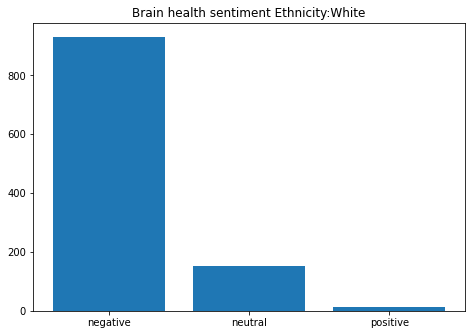

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_ethnicity[0,0], brain_corr_ethnicity[0,1], brain_corr_ethnicity[0,2]]
plt.title('Brain health sentiment Ethnicity:White')
ax.bar(x,y2)
plt.show()

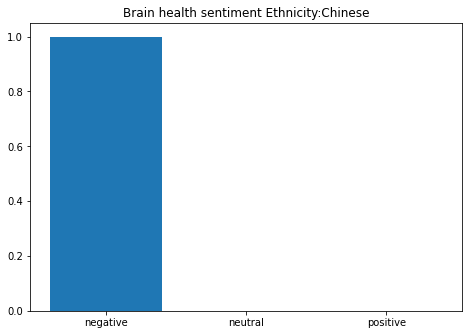

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_ethnicity[1,0], brain_corr_ethnicity[1,1], brain_corr_ethnicity[1,2]]
plt.title('Brain health sentiment Ethnicity:Chinese')
ax.bar(x,y2)
plt.show()

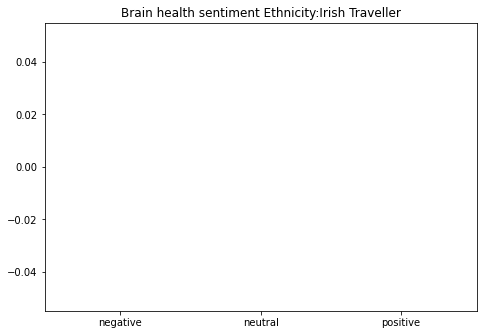

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_ethnicity[2,0], brain_corr_ethnicity[2,1], brain_corr_ethnicity[2,2]]
plt.title('Brain health sentiment Ethnicity:Irish Traveller')
ax.bar(x,y2)
plt.show()

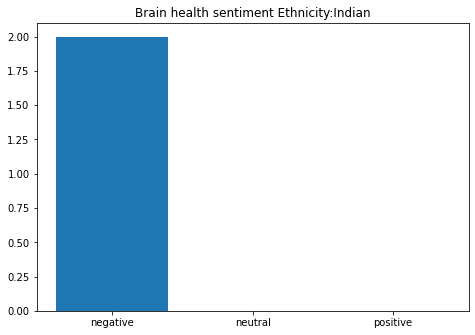

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_ethnicity[3,0], brain_corr_ethnicity[3,1], brain_corr_ethnicity[3,2]]
plt.title('Brain health sentiment Ethnicity:Indian')
ax.bar(x,y2)
plt.show()

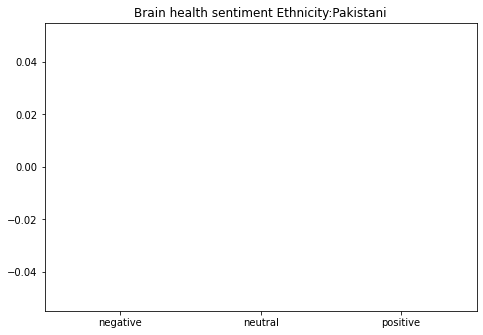

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_ethnicity[4,0], brain_corr_ethnicity[4,1], brain_corr_ethnicity[4,2]]
plt.title('Brain health sentiment Ethnicity:Pakistani')
ax.bar(x,y2)
plt.show()

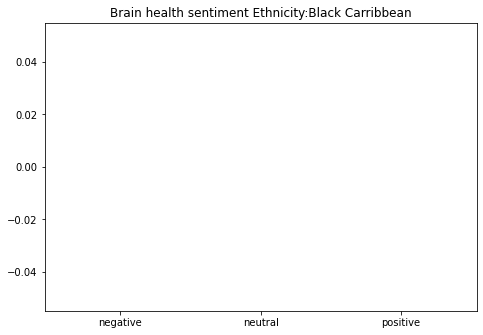

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_ethnicity[5,0], brain_corr_ethnicity[5,1], brain_corr_ethnicity[5,2]]
plt.title('Brain health sentiment Ethnicity:Black Carribbean')
ax.bar(x,y2)
plt.show()

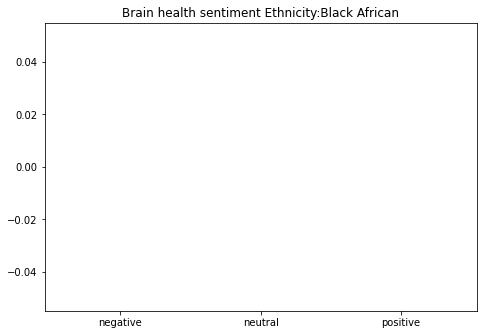

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_ethnicity[6,0], brain_corr_ethnicity[6,1], brain_corr_ethnicity[6,2]]
plt.title('Brain health sentiment Ethnicity:Black African')
ax.bar(x,y2)
plt.show()

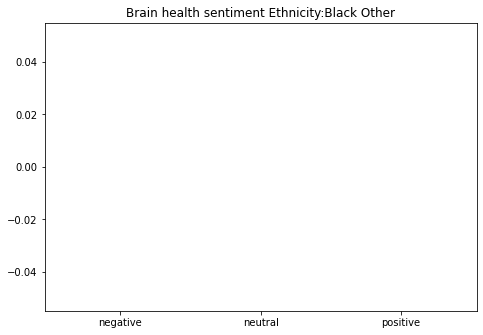

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_ethnicity[7,0], brain_corr_ethnicity[7,1], brain_corr_ethnicity[7,2]]
plt.title('Brain health sentiment Ethnicity:Black Other')
ax.bar(x,y2)
plt.show()

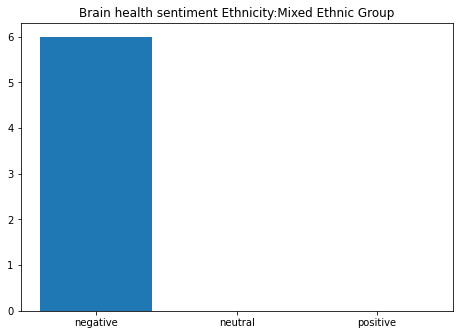

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_ethnicity[8,0], brain_corr_ethnicity[8,1], brain_corr_ethnicity[8,2]]
plt.title('Brain health sentiment Ethnicity:Mixed Ethnic Group')
ax.bar(x,y2)
plt.show()

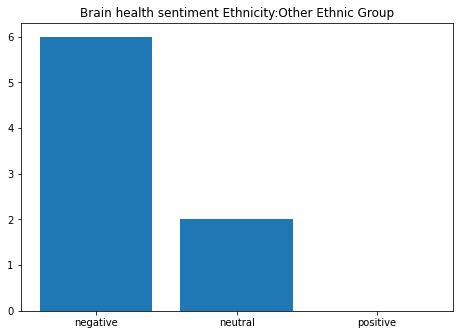

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_ethnicity[9,0], brain_corr_ethnicity[9,1], brain_corr_ethnicity[9,2]]
plt.title('Brain health sentiment Ethnicity:Other Ethnic Group')
ax.bar(x,y2)
plt.show()

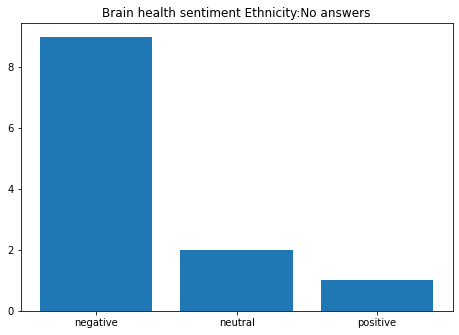

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_ethnicity[10,0], brain_corr_ethnicity[10,1], brain_corr_ethnicity[10,2]]
plt.title('Brain health sentiment Ethnicity:No answers')
ax.bar(x,y2)
plt.show()

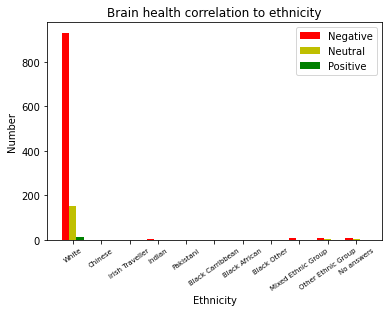

In [ ]:
N = 11
ind = np.arange(N) 
width = 0.25
  
data0 = [brain_corr_ethnicity[0,0],
         brain_corr_ethnicity[1,0],
         brain_corr_ethnicity[2,0],
         brain_corr_ethnicity[3,0],
         brain_corr_ethnicity[4,0],
         brain_corr_ethnicity[5,0],
         brain_corr_ethnicity[6,0],
         brain_corr_ethnicity[7,0],
         brain_corr_ethnicity[8,0],
         brain_corr_ethnicity[9,0],
         brain_corr_ethnicity[10,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [brain_corr_ethnicity[0,1],
         brain_corr_ethnicity[1,1], 
         brain_corr_ethnicity[2,1],
         brain_corr_ethnicity[3,1],
         brain_corr_ethnicity[4,1],
         brain_corr_ethnicity[5,1],
         brain_corr_ethnicity[6,1],
         brain_corr_ethnicity[7,1],
         brain_corr_ethnicity[8,1],
         brain_corr_ethnicity[9,1],
         brain_corr_ethnicity[10,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [brain_corr_ethnicity[0,2], 
         brain_corr_ethnicity[1,2], 
         brain_corr_ethnicity[2,2], 
         brain_corr_ethnicity[3,2], 
         brain_corr_ethnicity[4,2],
         brain_corr_ethnicity[5,2],
         brain_corr_ethnicity[6,2],
         brain_corr_ethnicity[7,2],
         brain_corr_ethnicity[8,2],
         brain_corr_ethnicity[9,2],
         brain_corr_ethnicity[10,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'g')
  
plt.xlabel("Ethnicity")
plt.ylabel('Number')
plt.title("Brain health correlation to ethnicity")
  
plt.xticks(ind+width,['White','Chinese','Irish Traveller', 'Indian','Pakistani',
                      'Black Carribbean','Black African','Black Other','Mixed Ethnic Group','Other Ethnic Group','No answers' ])
plt.xticks(rotation=35, fontsize =7)
plt.legend( (bar1, bar2, bar3), ('Negative', 'Neutral', 'Positive') )
plt.show()

#Brain health correlation to employment

In [ ]:
datafile = open('Brain.csv', 'r')
myreader = csv.reader(datafile)
brain_corr_employment = np.array([[0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],])
for row in myreader:
  if row[8] == '1':
    if row[23] == 'negative':
      brain_corr_employment[0,0] = brain_corr_employment[0,0]+1
    elif row[23] == 'neutral':         
      brain_corr_employment[0,1] = brain_corr_employment[0,1]+1
    else:
      brain_corr_employment[0,2] = brain_corr_employment[0,2]+1
  if row[8] == '2':
    if row[23] == 'negative':
      brain_corr_employment[1,0] = brain_corr_employment[1,0]+1
    elif row[23] == 'neutral':         
      brain_corr_employment[1,1] = brain_corr_employment[1,1]+1
    else:
      brain_corr_employment[1,2] = brain_corr_employment[1,2]+1
  if row[8] == '3':
    if row[23] == 'negative':
      brain_corr_employment[2,0] = brain_corr_employment[2,0]+1
    elif row[23] == 'neutral':         
      brain_corr_employment[2,1] = brain_corr_employment[2,1]+1
    else:
      brain_corr_employment[2,2] = brain_corr_employment[2,2]+1
  if row[8] == '4':
    if row[23] == 'negative':
      brain_corr_employment[3,0] = brain_corr_employment[3,0]+1
    elif row[23] == 'neutral':         
      brain_corr_employment[3,1] = brain_corr_employment[3,1]+1
    else:
      brain_corr_employment[3,2] = brain_corr_employment[3,2]+1
  if row[8] == '5':
    if row[23] == 'negative':
      brain_corr_employment[4,0] = brain_corr_employment[4,0]+1
    elif row[23] == 'neutral':         
      brain_corr_employment[4,1] = brain_corr_employment[4,1]+1
    else:
      brain_corr_employment[4,2] = brain_corr_employment[4,2]+1
  if row[8] == '6':
    if row[23] == 'negative':
      brain_corr_employment[5,0] = brain_corr_employment[5,0]+1
    elif row[23] == 'neutral':         
      brain_corr_employment[5,1] = brain_corr_employment[5,1]+1
    else:
      brain_corr_employment[5,2] = brain_corr_employment[5,2]+1
  if row[8] == '7' or row[8] =='0':
    if row[23] == 'negative':
      brain_corr_employment[6,0] = brain_corr_employment[6,0]+1
    elif row[23] == 'neutral':         
      brain_corr_employment[6,1] = brain_corr_employment[6,1]+1
    else:
      brain_corr_employment[6,2] = brain_corr_employment[6,2]+1
      
print(brain_corr_employment)

[[169  31   3]
 [126  24   0]
 [ 63   7   3]
 [ 27   6   1]
 [515  78   5]
 [ 44   8   0]
 [ 11   2   1]]


##Plot

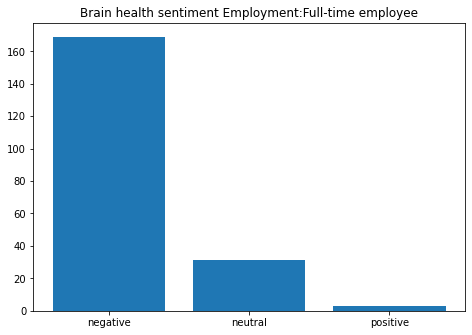

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_employment[0,0], brain_corr_employment[0,1], brain_corr_employment[0,2]]
plt.title('Brain health sentiment Employment:Full-time employee')
ax.bar(x,y2)
plt.show()

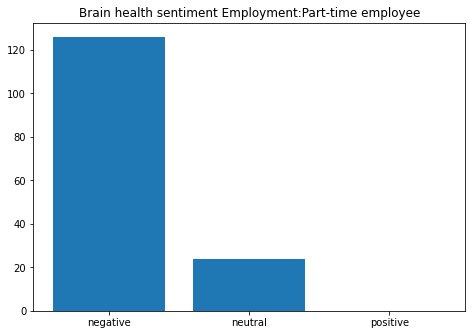

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_employment[1,0], brain_corr_employment[1,1], brain_corr_employment[1,2]]
plt.title('Brain health sentiment Employment:Part-time employee')
ax.bar(x,y2)
plt.show()

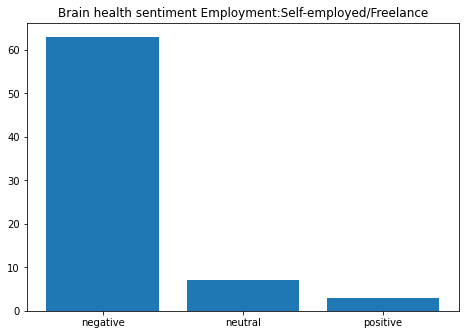

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_employment[2,0], brain_corr_employment[2,1], brain_corr_employment[2,2]]
plt.title('Brain health sentiment Employment:Self-employed/Freelance')
ax.bar(x,y2)
plt.show()

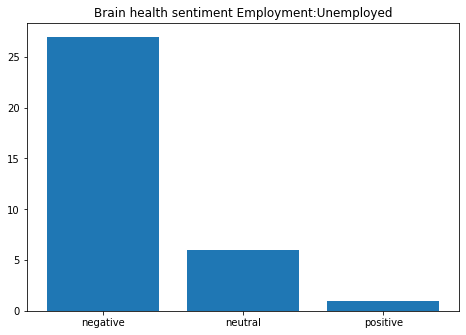

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_employment[3,0], brain_corr_employment[3,1], brain_corr_employment[3,2]]
plt.title('Brain health sentiment Employment:Unemployed')
ax.bar(x,y2)
plt.show()

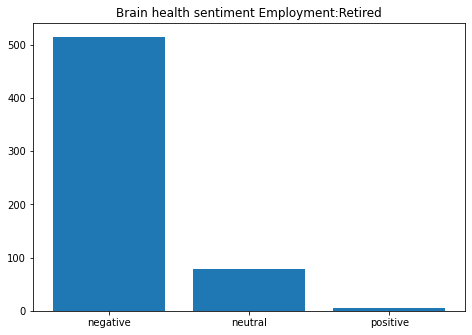

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_employment[4,0], brain_corr_employment[4,1], brain_corr_employment[4,2]]
plt.title('Brain health sentiment Employment:Retired')
ax.bar(x,y2)
plt.show()

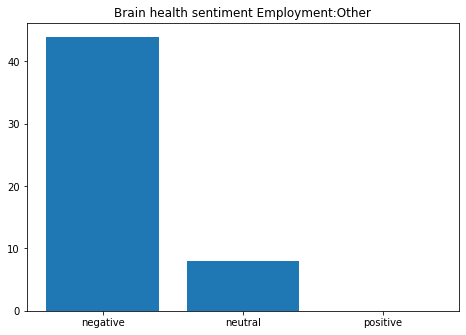

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_employment[5,0], brain_corr_employment[5,1], brain_corr_employment[5,2]]
plt.title('Brain health sentiment Employment:Other')
ax.bar(x,y2)
plt.show()

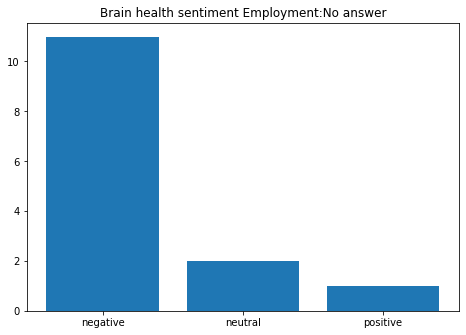

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_employment[6,0], brain_corr_employment[6,1], brain_corr_employment[6,2]]
plt.title('Brain health sentiment Employment:No answer')
ax.bar(x,y2)
plt.show()

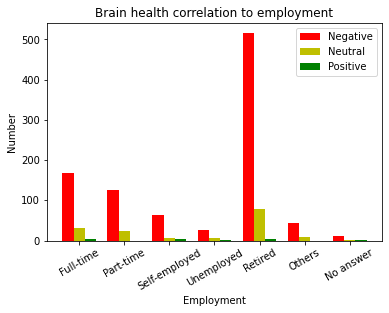

In [ ]:
N = 7
ind = np.arange(N) 
width = 0.25
  
data0 = [brain_corr_employment[0,0],
         brain_corr_employment[1,0],
         brain_corr_employment[2,0],
         brain_corr_employment[3,0],
         brain_corr_employment[4,0],
         brain_corr_employment[5,0],
         brain_corr_employment[6,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [brain_corr_employment[0,1],
         brain_corr_employment[1,1], 
         brain_corr_employment[2,1],
         brain_corr_employment[3,1],
         brain_corr_employment[4,1],
         brain_corr_employment[5,1],
         brain_corr_employment[6,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [brain_corr_employment[0,2], 
         brain_corr_employment[1,2], 
         brain_corr_employment[2,2], 
         brain_corr_employment[3,2],
         brain_corr_employment[4,2],
         brain_corr_employment[5,2],
         brain_corr_employment[6,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'g')
  
plt.xlabel("Employment")
plt.ylabel('Number')
plt.title("Brain health correlation to employment")
  
plt.xticks(ind+width,['Full-time', 'Part-time','Self-employed','Unemployed','Retired','Others', 'No answer'])
plt.xticks(rotation = 30)
plt.legend( (bar1, bar2, bar3), ('Negative', 'Neutral', 'Positive') )
plt.show()

#Brain health correlation to education

In [ ]:
datafile = open('Brain.csv', 'r')
myreader = csv.reader(datafile)
brain_corr_education = np.array([[0,0,0],
                                  [0,0,0],
                                  [0,0,0],
                                  [0,0,0],
                                  [0,0,0],
                                  [0,0,0]])

for row in myreader:
  if row[9] == '1':
    if row[23] == 'negative':
      brain_corr_education[0,0] = brain_corr_education[0,0]+1
    elif row[23] == 'neutral':         
      brain_corr_education[0,1] = brain_corr_education[0,1]+1
    else:
      brain_corr_education[0,2] = brain_corr_education[0,2]+1
  if row[9] == '2':
    if row[23] == 'negative':
      brain_corr_education[1,0] = brain_corr_education[1,0]+1
    elif row[23] == 'neutral':         
      brain_corr_education[1,1] = brain_corr_education[1,1]+1
    else:
      brain_corr_education[1,2] = brain_corr_education[1,2]+1
  if row[9] == '3':
    if row[23] == 'negative':
      brain_corr_education[2,0] = brain_corr_education[2,0]+1
    elif row[23] == 'neutral':         
      brain_corr_education[2,1] = brain_corr_education[2,1]+1
    else:
      brain_corr_education[2,2] = brain_corr_education[2,2]+1
  if row[9] == '4':
    if row[23] == 'negative':
      brain_corr_education[3,0] = brain_corr_education[3,0]+1
    elif row[23] == 'neutral':         
      brain_corr_education[3,1] = brain_corr_education[3,1]+1
    else:
      brain_corr_education[3,2] = brain_corr_education[3,2]+1
  if row[9] == '5':
    if row[23] == 'negative':
      brain_corr_education[4,0] = brain_corr_education[4,0]+1
    elif row[23] == 'neutral':         
      brain_corr_education[4,1] = brain_corr_education[4,1]+1
    else:
      brain_corr_education[4,2] = brain_corr_education[4,2]+1
  if row[9] == '6' or row[9] =='0':
    if row[23] == 'negative':
      brain_corr_education[5,0] = brain_corr_education[5,0]+1
    elif row[23] == 'neutral':         
      brain_corr_education[5,1] = brain_corr_education[5,1]+1
    else:
      brain_corr_education[5,2] = brain_corr_education[5,2]+1

print(brain_corr_education)

[[ 20   0   0]
 [143  29   6]
 [150  28   0]
 [363  44   4]
 [261  54   2]
 [ 18   1   1]]


##Plot

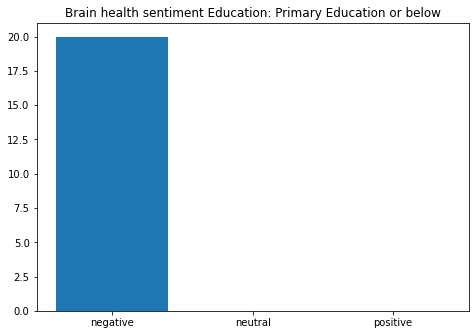

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_education[0,0], brain_corr_education[0,1], brain_corr_education[0,2]]
plt.title('Brain health sentiment Education: Primary Education or below')
ax.bar(x,y2)
plt.show()

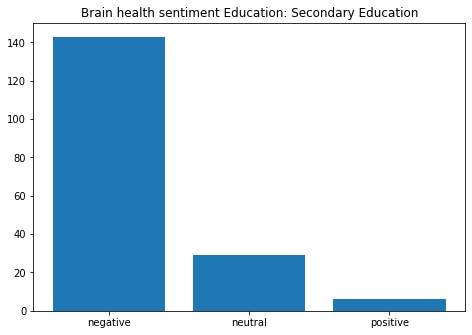

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_education[1,0], brain_corr_education[1,1], brain_corr_education[1,2]]
plt.title('Brain health sentiment Education: Secondary Education')
ax.bar(x,y2)
plt.show()

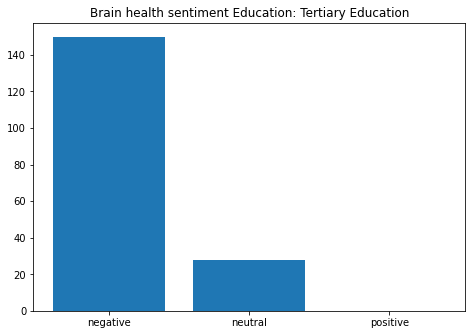

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_education[2,0], brain_corr_education[2,1], brain_corr_education[2,2]]
plt.title('Brain health sentiment Education: Tertiary Education')
ax.bar(x,y2)
plt.show()

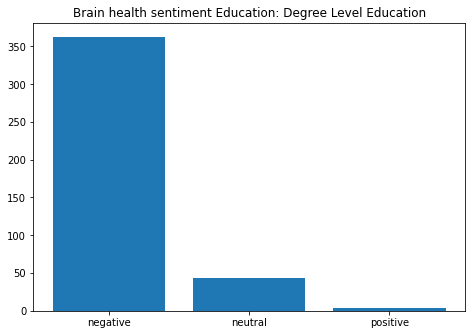

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_education[3,0], brain_corr_education[3,1], brain_corr_education[3,2]]
plt.title('Brain health sentiment Education: Degree Level Education')
ax.bar(x,y2)
plt.show()

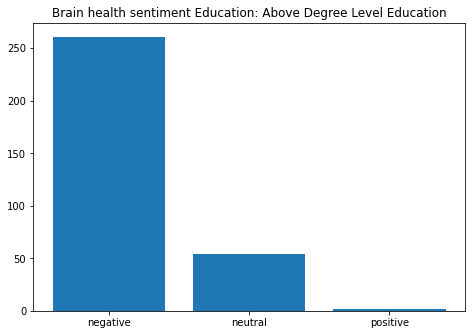

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_education[4,0], brain_corr_education[4,1], brain_corr_education[4,2]]
plt.title('Brain health sentiment Education: Above Degree Level Education')
ax.bar(x,y2)
plt.show()

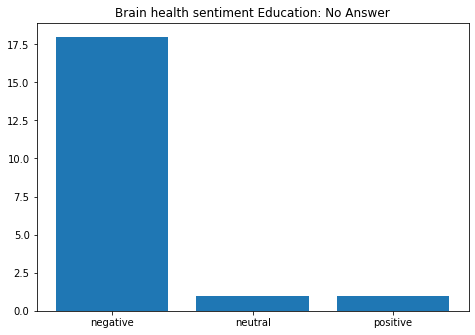

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_education[5,0], brain_corr_education[5,1], brain_corr_education[5,2]]
plt.title('Brain health sentiment Education: No Answer')
ax.bar(x,y2)
plt.show()

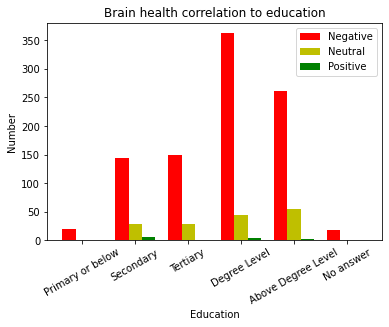

In [ ]:
N = 6
ind = np.arange(N) 
width = 0.25
  
data0 = [brain_corr_education[0,0],
         brain_corr_education[1,0],
         brain_corr_education[2,0],
         brain_corr_education[3,0],
         brain_corr_education[4,0],
         brain_corr_education[5,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [brain_corr_education[0,1],
         brain_corr_education[1,1], 
         brain_corr_education[2,1],
         brain_corr_education[3,1],
         brain_corr_education[4,1],
         brain_corr_education[5,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [brain_corr_education[0,2], 
         brain_corr_education[1,2], 
         brain_corr_education[2,2], 
         brain_corr_education[3,2], 
         brain_corr_education[4,2],
         brain_corr_education[5,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'g')
  
plt.xlabel("Education")
plt.ylabel('Number')
plt.title("Brain health correlation to education")
  
plt.xticks(ind+width,['Primary or below','Secondary','Tertiary','Degree Level', 'Above Degree Level','No answer'], rotation=30)
plt.legend( (bar1, bar2, bar3), ('Negative', 'Neutral', 'Positive') )
plt.show()

#_____________________________________________________

#Dietary Health Sentiment

In [ ]:
#Read file
datafile = open('Dietary full.csv', 'r')
myreader = csv.reader(datafile)
negative=0
neutral=0
positive=0
#Open to write to new file
with open('Brain dietary.csv', 'w') as new_file:
      csv_writer = csv.writer(new_file)
      for row in myreader:     
        print(row[19])

        #Apply tokenizer on response
        encoded_input = tokenizer(row[19], return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        ranking = np.argsort(scores)
        ranking = ranking[::-1]

        #Get highest ranking
        for i in range(scores.shape[0]):
          l = labels[ranking[i]]
          s = scores[ranking[i]]  
          break 

        #Get number of negative/neutral/positive
        if l == 'negative':
          negative = negative+1
        elif l == 'neutral':         
          neutral = neutral+1
        else:
          positive = positive+1

        #Write responses row to new file and append sentiment to the end of column
        csv_writer.writerow(row+[l]) 

print("Negative:",negative)
print("Neutral",neutral)
print("Positive",positive)

#Brain health correlation to geggg

In [ ]:
datafile = open('Brain dietary.csv', 'r')
myreader = csv.reader(datafile)
gge = np.array([[0,0,0],
                            [0,0,0],
                            [0,0,0],
                            [0,0,0],
                            [0,0,0]])

for row in myreader:
  if row[10] == '1':
    if row[23] == 'negative':
      gge[0,0] = gge[0,0]+1
    elif row[23] == 'neutral':         
      gge[0,1] = gge[0,1]+1
    else:
      gge[0,2] = gge[0,2]+1
  if row[10] == '2':
    if row[23] == 'negative':
     gge[1,0] = gge[1,0]+1
    elif row[23] == 'neutral':         
      gge[1,1] = ggez[1,1]+1
    else:
      gge[1,2] = gge[1,2]+1
  if row[10] == '3':
    if row[23] == 'negative':
      gge[2,0] = gge[2,0]+1
    elif row[23] == 'neutral':         
      gge[2,1] = gge[2,1]+1
    else:
      gge[2,2] = gge[2,2]+1
  if row[10] == '4':
    if row[23] == 'negative':
      gge[3,0] = gge[3,0]+1
    elif row[23] == 'neutral':         
      gge[3,1] = gge[3,1]+1
    else:
      gge[3,2] = gge[3,2]+1
  if row[10] == '5':
    if row[23] == 'negative':
      gge[4,0] = gge[4,0]+1
    elif row[23] == 'neutral':         
      gge[4,1] = gge[4,1]+1
    else:
      gge[4,2] = gge[4,2]+1

print(gge)

[[158 317   2]
 [ 52  17   0]
 [ 67 142   0]
 [ 84 205   1]
 [  0   0   0]]


##Plot

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

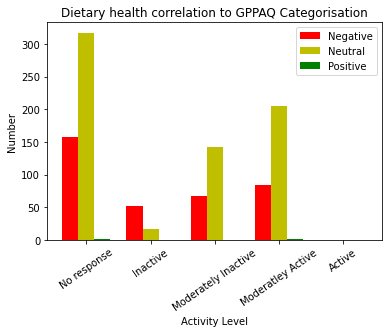

In [ ]:
N = 5
ind = np.arange(N) 
width = 0.25
  
data0 = [gge[0,0],
         gge[1,0],
         gge[2,0],
         gge[3,0],
         gge[4,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [gge[0,1],
         gge[1,1], 
         gge[2,1],
         gge[3,1],
         gge[4,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [gge[0,2], 
         gge[1,2], 
         gge[2,2], 
         gge[3,2], 
         gge[4,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'g')
  
plt.xlabel("Activity Level")
plt.ylabel('Number')
plt.title("Dietary health correlation to GPPAQ Categorisation")
  
plt.xticks(ind+width,['No response','Inactive','Moderately Inactive', 'Moderatley Active','Active'])
plt.xticks(rotation=35)
plt.legend( (bar1, bar2, bar3), ('Negative', 'Neutral', 'Positive') )
plt.show()

NameError: ignored

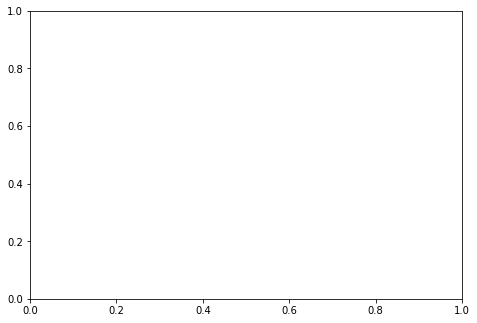

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_age[0,0], brain_corr_age[0,1], brain_corr_age[0,2]]
plt.title('Brain health sentiment age:16-39')
ax.bar(x,y2)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [brain_corr_age[1,0], brain_corr_age[1,1], brain_corr_age[1,2]]
plt.title('Brain health sentiment age:40-49')
ax.bar(x,y2)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y3 = [brain_corr_age[2,0], brain_corr_age[2,1], brain_corr_age[2,2]]
plt.title('Brain health sentiment age:50-65')
ax.bar(x,y3)
plt.show()


In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y4 = [brain_corr_age[3,0], brain_corr_age[3,1], brain_corr_age[3,2]]
plt.title('Brain health sentiment age:66-74')
ax.bar(x,y4)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y5 = [brain_corr_age[4,0], brain_corr_age[4,1], brain_corr_age[4,2]]
plt.title('Brain health sentiment age:75+')
ax.bar(x,y5)
plt.show()


#Dietary health correlation to age

In [ ]:
datafile = open('Brain dietary.csv', 'r')
myreader = csv.reader(datafile)
dietary_corr_age = np.array([[0,0,0],
                            [0,0,0],
                            [0,0,0],
                            [0,0,0],
                            [0,0,0]])

for row in myreader:
  if row[4] == '1':
    if row[23] == 'negative':
      dietary_corr_age[0,0] = dietary_corr_age[0,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_age[0,1] = dietary_corr_age[0,1]+1
    else:
      dietary_corr_age[0,2] = dietary_corr_age[0,2]+1
  if row[4] == '2':
    if row[23] == 'negative':
      dietary_corr_age[1,0] = dietary_corr_age[1,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_age[1,1] = dietary_corr_age[1,1]+1
    else:
      dietary_corr_age[1,2] = dietary_corr_age[1,2]+1
  if row[4] == '3':
    if row[23] == 'negative':
      dietary_corr_age[2,0] = dietary_corr_age[2,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_age[2,1] = dietary_corr_age[2,1]+1
    else:
      dietary_corr_age[2,2] = dietary_corr_age[2,2]+1
  if row[4] == '4':
    if row[23] == 'negative':
      dietary_corr_age[3,0] = dietary_corr_age[3,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_age[3,1] = dietary_corr_age[3,1]+1
    else:
      dietary_corr_age[3,2] = dietary_corr_age[3,2]+1
  if row[4] == '5':
    if row[23] == 'negative':
      dietary_corr_age[4,0] = dietary_corr_age[4,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_age[4,1] = dietary_corr_age[4,1]+1
    else:
      dietary_corr_age[4,2] = dietary_corr_age[4,2]+1

In [ ]:
print(dietary_corr_age)

[[  0   0   0]
 [ 31  91   0]
 [181 387   3]
 [133 244   1]
 [ 49  96   0]]


###Plot

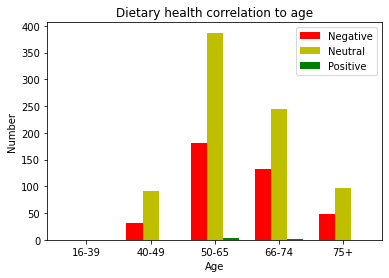

In [ ]:
N = 5
ind = np.arange(N) 
width = 0.25
  
data0 = [dietary_corr_age[0,0],
         dietary_corr_age[1,0],
         dietary_corr_age[2,0],
         dietary_corr_age[3,0],
         dietary_corr_age[4,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [dietary_corr_age[0,1],
         dietary_corr_age[1,1], 
         dietary_corr_age[2,1],
         dietary_corr_age[3,1],
         dietary_corr_age[4,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [dietary_corr_age[0,2], 
         dietary_corr_age[1,2], 
         dietary_corr_age[2,2], 
         dietary_corr_age[3,2], 
         dietary_corr_age[4,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'g')
  
plt.xlabel("Age")
plt.ylabel('Number')
plt.title("Dietary health correlation to age")
  
plt.xticks(ind+width,['16-39','40-49','50-65', '66-74','75+'])
plt.legend( (bar1, bar2, bar3), ('Negative', 'Neutral', 'Positive') )
plt.show()

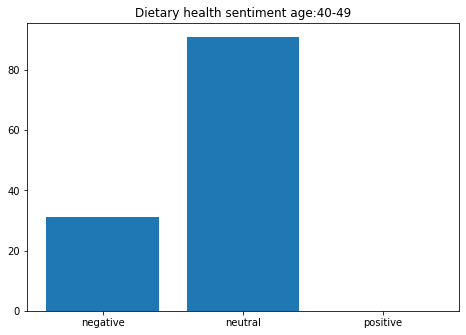

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_age[1,0], dietary_corr_age[1,1], dietary_corr_age[1,2]]
plt.title('Dietary health sentiment age:40-49')
ax.bar(x,y2)
plt.show()

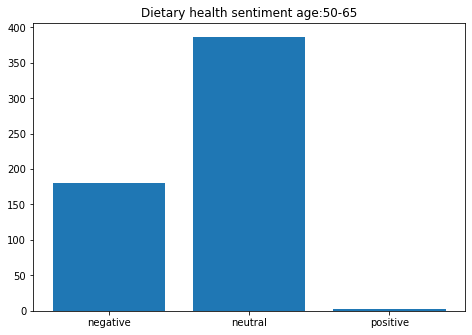

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y3 = [dietary_corr_age[2,0], dietary_corr_age[2,1], dietary_corr_age[2,2]]
plt.title('Dietary health sentiment age:50-65')
ax.bar(x,y3)
plt.show()

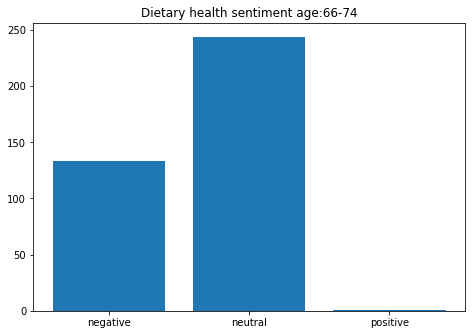

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y4 = [dietary_corr_age[3,0], dietary_corr_age[3,1], dietary_corr_age[3,2]]
plt.title('Dietary health sentiment age:66-74')
ax.bar(x,y4)
plt.show()

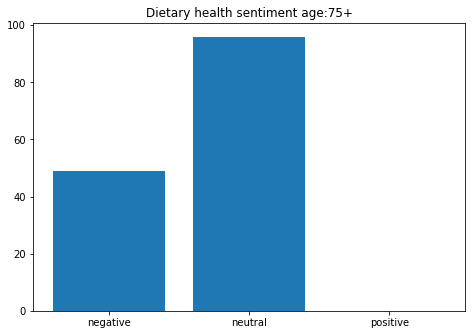

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y5 = [dietary_corr_age[4,0], dietary_corr_age[4,1], dietary_corr_age[4,2]]
plt.title('Dietary health sentiment age:75+')
ax.bar(x,y5)
plt.show()

#Dietary health correlation to country

In [ ]:
datafile = open('Brain dietary.csv', 'r')
myreader = csv.reader(datafile)
dietary_corr_country = np.array([[0,0,0],
                              [0,0,0],
                              [0,0,0],
                              [0,0,0],
                              [0,0,0]])
for row in myreader:
  if row[5] == '1':
    if row[23] == 'negative':
      dietary_corr_country[0,0] = dietary_corr_country[0,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_country[0,1] = dietary_corr_country[0,1]+1
    else:
      dietary_corr_country[0,2] = dietary_corr_country[0,2]+1
  if row[5] == '2':
    if row[23] == 'negative':
     dietary_corr_country[1,0] = dietary_corr_country[1,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_country[1,1] = dietary_corr_country[1,1]+1
    else:
      dietary_corr_country[1,2] = dietary_corr_country[1,2]+1
  if row[5] == '3':
    if row[23] == 'negative':
      dietary_corr_country[2,0] = dietary_corr_country[2,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_country[2,1] = dietary_corr_country[2,1]+1
    else:
      dietary_corr_country[2,2] = dietary_corr_country[2,2]+1
  if row[5] == '4':
    if row[23] == 'negative':
      dietary_corr_country[3,0] = dietary_corr_country[3,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_country[3,1] = dietary_corr_country[3,1]+1
    else:
      dietary_corr_country[3,2] = dietary_corr_country[3,2]+1
  if row[5] == '5':
    if row[23] == 'negative':
      dietary_corr_country[4,0] = dietary_corr_country[4,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_country[4,1] = dietary_corr_country[4,1]+1
    else:
      dietary_corr_country[4,2] = dietary_corr_country[4,2]+1


In [ ]:
print(dietary_corr_country)

[[ 41 106   0]
 [ 93 193   1]
 [ 46 105   0]
 [208 390   3]
 [  6  24   0]]


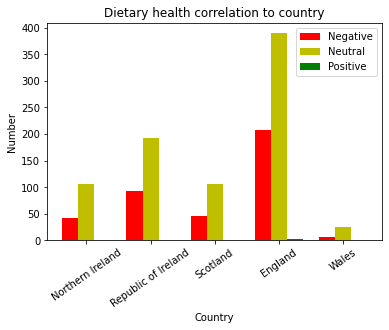

In [ ]:
N = 5
ind = np.arange(N) 
width = 0.25
  
data0 = [dietary_corr_country[0,0],
         dietary_corr_country[1,0],
         dietary_corr_country[2,0],
         dietary_corr_country[3,0],
         dietary_corr_country[4,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [dietary_corr_country[0,1],
         dietary_corr_country[1,1], 
         dietary_corr_country[2,1],
         dietary_corr_country[3,1],
         dietary_corr_country[4,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [dietary_corr_country[0,2], 
         dietary_corr_country[1,2], 
         dietary_corr_country[2,2], 
         dietary_corr_country[3,2], 
         dietary_corr_country[4,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'g')
  
plt.xlabel("Country")
plt.ylabel('Number')
plt.title("Dietary health correlation to country")
  
plt.xticks(ind+width,['Northern Ireland','Republic of Ireland','Scotland', 'England','Wales'])
plt.xticks(rotation=35)
plt.legend( (bar1, bar2, bar3), ('Negative', 'Neutral', 'Positive') )
plt.show()


##Plot

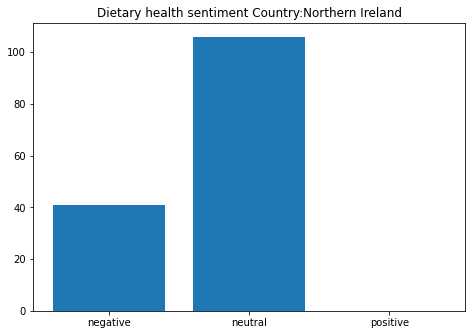

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_country[0,0], dietary_corr_country[0,1], dietary_corr_country[0,2]]
plt.title('Dietary health sentiment Country:Northern Ireland')
ax.bar(x,y2)
plt.show()

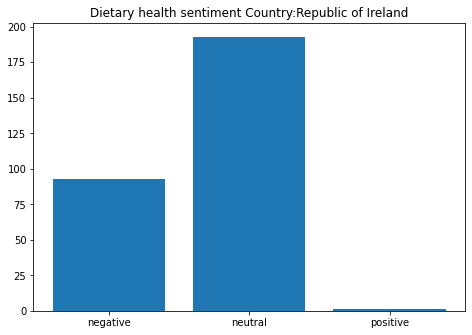

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_country[1,0], dietary_corr_country[1,1], dietary_corr_country[1,2]]
plt.title('Dietary health sentiment Country:Republic of Ireland')
ax.bar(x,y2)
plt.show()

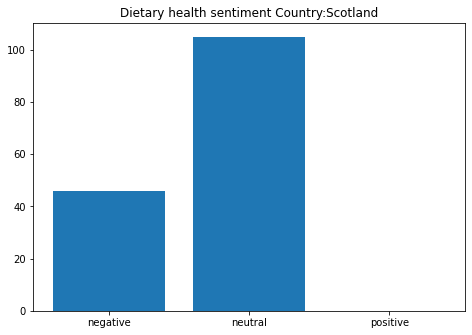

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_country[2,0], dietary_corr_country[2,1], dietary_corr_country[2,2]]
plt.title('Dietary health sentiment Country:Scotland')
ax.bar(x,y2)
plt.show()

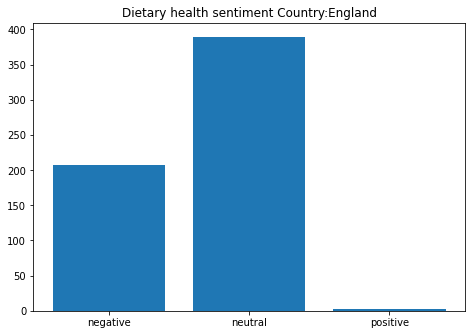

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_country[3,0], dietary_corr_country[3,1], dietary_corr_country[3,2]]
plt.title('Dietary health sentiment Country:England')
ax.bar(x,y2)
plt.show()

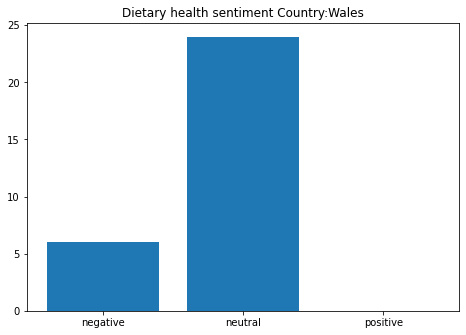

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_country[4,0], dietary_corr_country[4,1], dietary_corr_country[4,2]]
plt.title('Dietary health sentiment Country:Wales')
ax.bar(x,y2)
plt.show()

#Dietary health correlation to gender

In [ ]:
datafile = open('Brain dietary.csv', 'r')
myreader = csv.reader(datafile)
dietary_corr_gender = np.array([[0,0,0],
                              [0,0,0],
                              [0,0,0],
                              [0,0,0],])

for row in myreader:
  if row[6] == '1':
    if row[23] == 'negative':
      dietary_corr_gender[0,0] = dietary_corr_gender[0,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_gender[0,1] = dietary_corr_gender[0,1]+1
    else:
      dietary_corr_gender[0,2] = dietary_corr_gender[0,2]+1
  if row[6] == '2':
    if row[23] == 'negative':
      dietary_corr_gender[1,0] = dietary_corr_gender[1,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_gender[1,1] = dietary_corr_gender[1,1]+1
    else:
      dietary_corr_gender[1,2] = dietary_corr_gender[1,2]+1
  if row[6] == '3':
    if row[23] == 'negative':
      dietary_corr_gender[2,0] = dietary_corr_gender[2,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_gender[2,1] = dietary_corr_gender[2,1]+1
    else:
      dietary_corr_gender[2,2] = dietary_corr_gender[2,2]+1
  if row[6] == '4' or row[6] == '0':
    if row[23] == 'negative':
      dietary_corr_gender[3,0] = dietary_corr_gender[3,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_gender[3,1] = dietary_corr_gender[3,1]+1
    else:
      dietary_corr_gender[3,2] = dietary_corr_gender[3,2]+1

print(dietary_corr_gender)

[[ 80 167   1]
 [312 643   3]
 [  0   1   0]
 [  2   8   0]]


##Plot

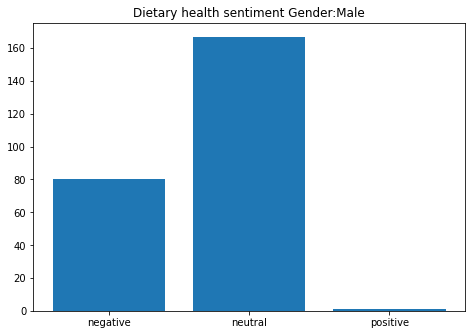

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_gender[0,0], dietary_corr_gender[0,1], dietary_corr_gender[0,2]]
plt.title('Dietary health sentiment Gender:Male')
ax.bar(x,y2)
plt.show()

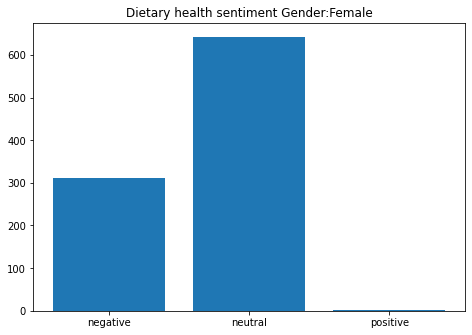

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_gender[1,0], dietary_corr_gender[1,1], dietary_corr_gender[1,2]]
plt.title('Dietary health sentiment Gender:Female')
ax.bar(x,y2)
plt.show()

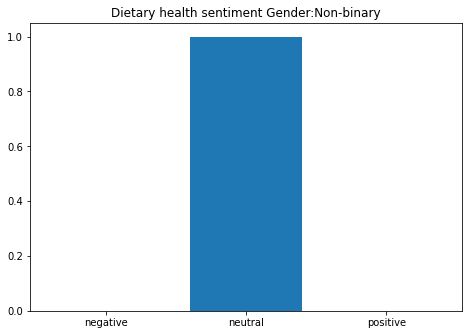

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_gender[2,0], dietary_corr_gender[2,1], dietary_corr_gender[2,2]]
plt.title('Dietary health sentiment Gender:Non-binary')
ax.bar(x,y2)
plt.show()

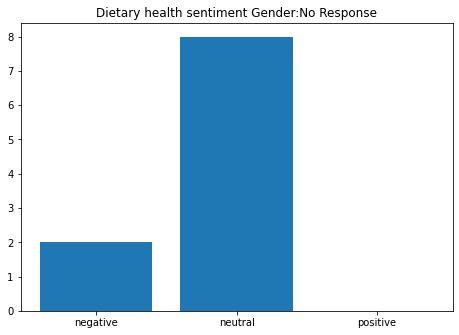

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_gender[3,0], dietary_corr_gender[3,1], dietary_corr_gender[3,2]]
plt.title('Dietary health sentiment Gender:No Response')
ax.bar(x,y2)
plt.show()

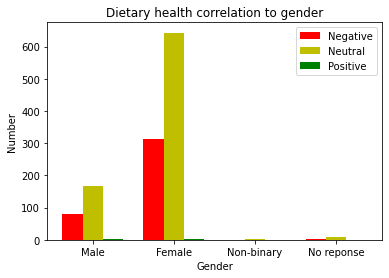

In [ ]:
N = 4
ind = np.arange(N) 
width = 0.25
  
data0 = [dietary_corr_gender[0,0],
         dietary_corr_gender[1,0],
         dietary_corr_gender[2,0],
         dietary_corr_gender[3,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [dietary_corr_gender[0,1],
         dietary_corr_gender[1,1], 
         dietary_corr_gender[2,1],
         dietary_corr_gender[3,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [dietary_corr_gender[0,2], 
         dietary_corr_gender[1,2], 
         dietary_corr_gender[2,2], 
         dietary_corr_gender[3,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'g')
  
plt.xlabel("Gender")
plt.ylabel('Number')
plt.title("Dietary health correlation to gender")
  
plt.xticks(ind+width,['Male','Female', 'Non-binary','No reponse'])
plt.legend( (bar1, bar2, bar3), ('Negative', 'Neutral', 'Positive') )
plt.show()

#Dietary health correlation to ethnicity

In [ ]:
datafile = open('Brain dietary.csv', 'r')
myreader = csv.reader(datafile)
dietary_corr_ethnicity = np.array([[0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],
                                [0,0,0],])
for row in myreader:
  if row[7] == '1':
    if row[23] == 'negative':
      dietary_corr_ethnicity[0,0] = dietary_corr_ethnicity[0,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_ethnicity[0,1] = dietary_corr_ethnicity[0,1]+1
    else:
      dietary_corr_ethnicity[0,2] = dietary_corr_ethnicity[0,2]+1
  if row[7] == '2':
    if row[23] == 'negative':
      dietary_corr_ethnicity[1,0] = dietary_corr_ethnicity[1,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_ethnicity[1,1] = dietary_corr_ethnicity[1,1]+1
    else:
      dietary_corr_ethnicity[1,2] = dietary_corr_ethnicity[1,2]+1
  if row[7] == '3':
    if row[23] == 'negative':
      dietary_corr_ethnicity[2,0] = dietary_corr_ethnicity[2,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_ethnicity[2,1] = dietary_corr_ethnicity[2,1]+1
    else:
      dietary_corr_ethnicity[2,2] = dietary_corr_ethnicity[2,2]+1
  if row[7] == '4':
    if row[23] == 'negative':
      dietary_corr_ethnicity[3,0] = dietary_corr_ethnicity[3,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_ethnicity[3,1] = dietary_corr_ethnicity[3,1]+1
    else:
      dietary_corr_ethnicity[3,2] = dietary_corr_ethnicity[3,2]+1
  if row[7] == '5':
    if row[23] == 'negative':
      dietary_corr_ethnicity[4,0] = dietary_corr_ethnicity[4,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_ethnicity[4,1] = dietary_corr_ethnicity[4,1]+1
    else:
      dietary_corr_ethnicity[4,2] = dietary_corr_ethnicity[4,2]+1
  if row[7] == '6':
    if row[23] == 'negative':
      dietary_corr_ethnicity[5,0] = dietary_corr_ethnicity[5,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_ethnicity[5,1] = dietary_corr_ethnicity[5,1]+1
    else:
      dietary_corr_ethnicity[5,2] = dietary_corr_ethnicity[5,2]+1
  if row[7] == '7':
    if row[23] == 'negative':
      dietary_corr_ethnicity[6,0] = dietary_corr_ethnicity[6,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_ethnicity[6,1] = dietary_corr_ethnicity[6,1]+1
    else:
      dietary_corr_ethnicity[6,2] = dietary_corr_ethnicity[6,2]+1
  if row[7] == '8':
    if row[23] == 'negative':
      dietary_corr_ethnicity[7,0] = dietary_corr_ethnicity[7,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_ethnicity[7,1] = dietary_corr_ethnicity[7,1]+1
    else:
      dietary_corr_ethnicity[7,2] = dietary_corr_ethnicity[7,2]+1
  if row[7] == '9':
    if row[23] == 'negative':
      dietary_corr_ethnicity[8,0] = dietary_corr_ethnicity[8,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_ethnicity[8,1] = dietary_corr_ethnicity[8,1]+1
    else:
      dietary_corr_ethnicity[8,2] = dietary_corr_ethnicity[8,2]+1
  if row[7] == '10':
    if row[23] == 'negative':
      dietary_corr_ethnicity[9,0] = dietary_corr_ethnicity[9,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_ethnicity[9,1] = dietary_corr_ethnicity[9,1]+1
    else:
      dietary_corr_ethnicity[9,2] = dietary_corr_ethnicity[9,2]+1
  if row[7] == '11' or row[7] == '0':
    if row[23] == 'negative':
      dietary_corr_ethnicity[10,0] = dietary_corr_ethnicity[10,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_ethnicity[10,1] = dietary_corr_ethnicity[10,1]+1
    else:
      dietary_corr_ethnicity[10,2] = dietary_corr_ethnicity[10,2]+1

print(dietary_corr_ethnicity)

[[384 799   4]
 [  1   1   0]
 [  0   0   0]
 [  0   2   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  2   3   0]
 [  3   6   0]
 [  4   8   0]]


##Plot

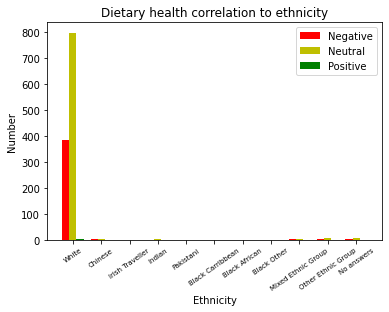

In [ ]:
N = 11
ind = np.arange(N) 
width = 0.25
  
data0 = [dietary_corr_ethnicity[0,0],
         dietary_corr_ethnicity[1,0],
         dietary_corr_ethnicity[2,0],
         dietary_corr_ethnicity[3,0],
         dietary_corr_ethnicity[4,0],
         dietary_corr_ethnicity[5,0],
         dietary_corr_ethnicity[6,0],
         dietary_corr_ethnicity[7,0],
         dietary_corr_ethnicity[8,0],
         dietary_corr_ethnicity[9,0],
         dietary_corr_ethnicity[10,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [dietary_corr_ethnicity[0,1],
         dietary_corr_ethnicity[1,1], 
         dietary_corr_ethnicity[2,1],
         dietary_corr_ethnicity[3,1],
         dietary_corr_ethnicity[4,1],
         dietary_corr_ethnicity[5,1],
         dietary_corr_ethnicity[6,1],
         dietary_corr_ethnicity[7,1],
         dietary_corr_ethnicity[8,1],
         dietary_corr_ethnicity[9,1],
         dietary_corr_ethnicity[10,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [dietary_corr_ethnicity[0,2], 
         dietary_corr_ethnicity[1,2], 
         dietary_corr_ethnicity[2,2], 
         dietary_corr_ethnicity[3,2], 
         dietary_corr_ethnicity[4,2],
         dietary_corr_ethnicity[5,2],
         dietary_corr_ethnicity[6,2],
         dietary_corr_ethnicity[7,2],
         dietary_corr_ethnicity[8,2],
         dietary_corr_ethnicity[9,2],
         dietary_corr_ethnicity[10,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'g')
  
plt.xlabel("Ethnicity")
plt.ylabel('Number')
plt.title("Dietary health correlation to ethnicity")
  
plt.xticks(ind+width,['White','Chinese','Irish Traveller', 'Indian','Pakistani',
                      'Black Carribbean','Black African','Black Other','Mixed Ethnic Group','Other Ethnic Group','No answers' ])
plt.xticks(rotation=35, fontsize =7)
plt.legend( (bar1, bar2, bar3), ('Negative', 'Neutral', 'Positive') )
plt.show()

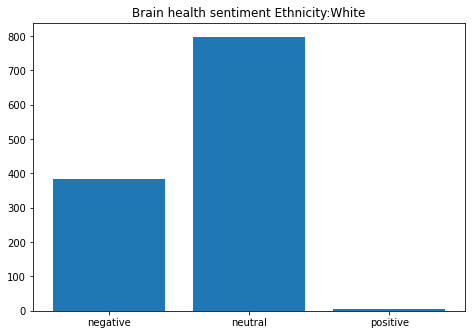

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_ethnicity[0,0], dietary_corr_ethnicity[0,1], dietary_corr_ethnicity[0,2]]
plt.title('Brain health sentiment Ethnicity:White')
ax.bar(x,y2)
plt.show()

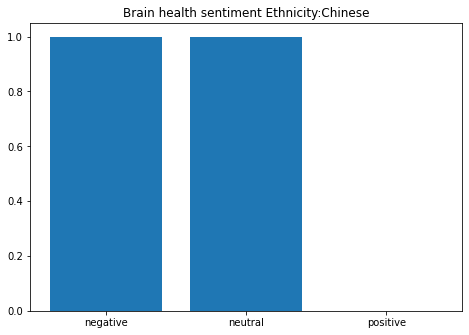

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_ethnicity[1,0], dietary_corr_ethnicity[1,1], dietary_corr_ethnicity[1,2]]
plt.title('Brain health sentiment Ethnicity:Chinese')
ax.bar(x,y2)
plt.show()

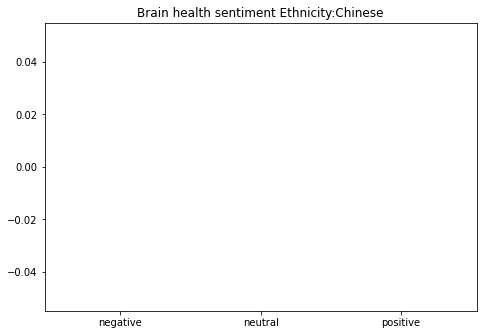

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_ethnicity[2,0], dietary_corr_ethnicity[2,1], dietary_corr_ethnicity[2,2]]
plt.title('Brain health sentiment Ethnicity:Chinese')
ax.bar(x,y2)
plt.show()

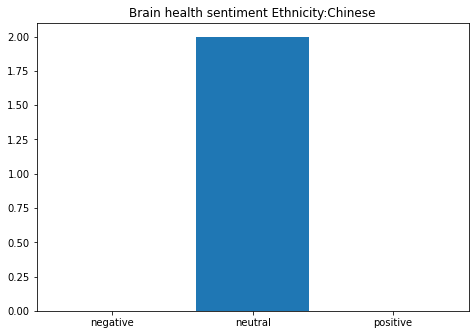

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_ethnicity[3,0], dietary_corr_ethnicity[3,1], dietary_corr_ethnicity[3,2]]
plt.title('Brain health sentiment Ethnicity:Chinese')
ax.bar(x,y2)
plt.show()

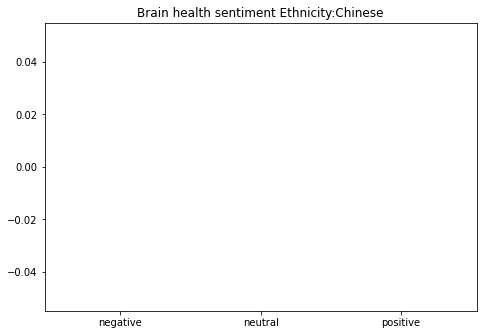

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_ethnicity[4,0], dietary_corr_ethnicity[4,1], dietary_corr_ethnicity[4,2]]
plt.title('Brain health sentiment Ethnicity:Chinese')
ax.bar(x,y2)
plt.show()

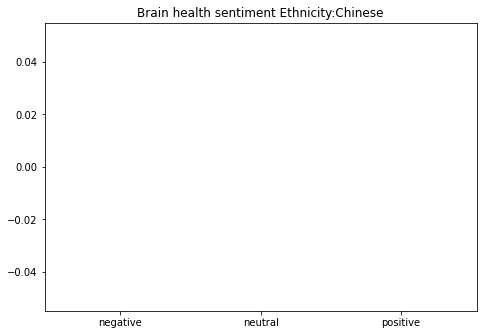

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_ethnicity[5,0], dietary_corr_ethnicity[5,1], dietary_corr_ethnicity[5,2]]
plt.title('Brain health sentiment Ethnicity:Chinese')
ax.bar(x,y2)
plt.show()

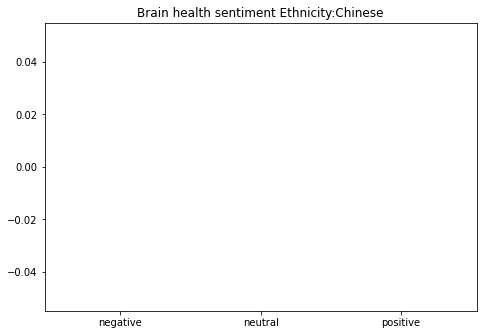

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_ethnicity[6,0], dietary_corr_ethnicity[6,1], dietary_corr_ethnicity[6,2]]
plt.title('Brain health sentiment Ethnicity:Chinese')
ax.bar(x,y2)
plt.show()

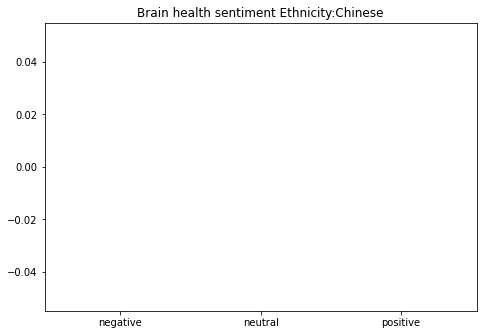

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_ethnicity[7,0], dietary_corr_ethnicity[7,1], dietary_corr_ethnicity[7,2]]
plt.title('Brain health sentiment Ethnicity:Chinese')
ax.bar(x,y2)
plt.show()

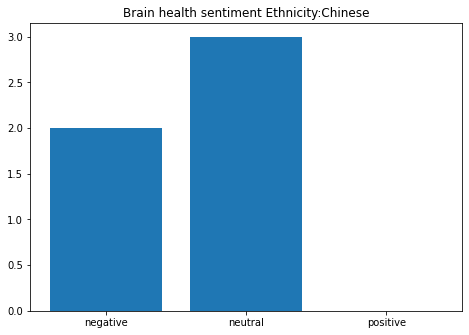

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_ethnicity[8,0], dietary_corr_ethnicity[8,1], dietary_corr_ethnicity[8,2]]
plt.title('Brain health sentiment Ethnicity:Chinese')
ax.bar(x,y2)
plt.show()

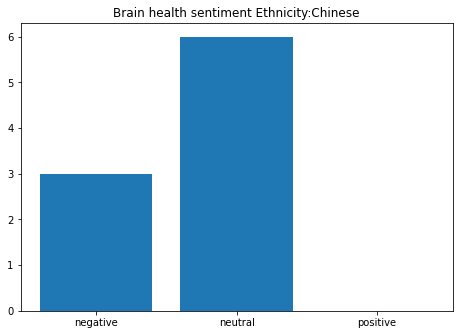

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_ethnicity[9,0], dietary_corr_ethnicity[9,1], dietary_corr_ethnicity[9,2]]
plt.title('Brain health sentiment Ethnicity:Chinese')
ax.bar(x,y2)
plt.show()

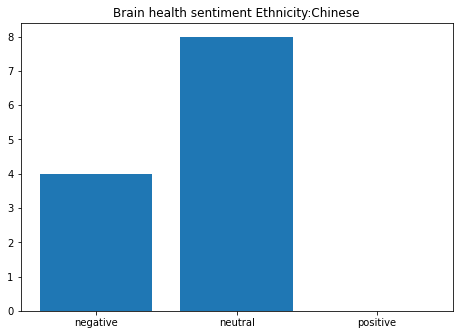

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_ethnicity[10,0], dietary_corr_ethnicity[10,1], dietary_corr_ethnicity[10,2]]
plt.title('Brain health sentiment Ethnicity:Chinese')
ax.bar(x,y2)
plt.show()

#Dietary health correlation to employment

In [ ]:
datafile = open('Brain dietary.csv', 'r')
myreader = csv.reader(datafile)
dietary_corr_employment = np.array([[0,0,0],
                                    [0,0,0],
                                    [0,0,0],
                                    [0,0,0],
                                    [0,0,0],
                                    [0,0,0],
                                    [0,0,0]])

for row in myreader:
  if row[8] == '1':
    if row[23] == 'negative':
      dietary_corr_employment[0,0] = dietary_corr_employment[0,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_employment[0,1] = dietary_corr_employment[0,1]+1
    else:
      dietary_corr_employment[0,2] = dietary_corr_employment[0,2]+1
  if row[8] == '2':
    if row[23] == 'negative':
      dietary_corr_employment[1,0] = dietary_corr_employment[1,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_employment[1,1] = dietary_corr_employment[1,1]+1
    else:
      dietary_corr_employment[1,2] = dietary_corr_employment[1,2]+1
  if row[8] == '3':
    if row[23] == 'negative':
      dietary_corr_employment[2,0] = dietary_corr_employment[2,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_employment[2,1] = dietary_corr_employment[2,1]+1
    else:
      dietary_corr_employment[2,2] = dietary_corr_employment[2,2]+1
  if row[8] == '4':
    if row[23] == 'negative':
      dietary_corr_employment[3,0] = dietary_corr_employment[3,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_employment[3,1] = dietary_corr_employment[3,1]+1
    else:
      dietary_corr_employment[3,2] = dietary_corr_employment[3,2]+1
  if row[8] == '5':
    if row[23] == 'negative':
      dietary_corr_employment[4,0] = dietary_corr_employment[4,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_employment[4,1] = dietary_corr_employment[4,1]+1
    else:
      dietary_corr_employment[4,2] = dietary_corr_employment[4,2]+1
  if row[8] == '6':
    if row[23] == 'negative':
      dietary_corr_employment[5,0] = dietary_corr_employment[5,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_employment[5,1] = dietary_corr_employment[5,1]+1
    else:
      dietary_corr_employment[5,2] = dietary_corr_employment[5,2]+1
  if row[8] == '7' or row[8] =='0':
    if row[23] == 'negative':
      dietary_corr_employment[6,0] = dietary_corr_employment[6,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_employment[6,1] = dietary_corr_employment[6,1]+1
    else:
      dietary_corr_employment[6,2] = dietary_corr_employment[6,2]+1


print(dietary_corr_employment)

[[ 66 175   0]
 [ 48 119   0]
 [ 26  53   2]
 [ 12  23   0]
 [216 399   2]
 [ 22  34   0]
 [  4  16   0]]


##Plot

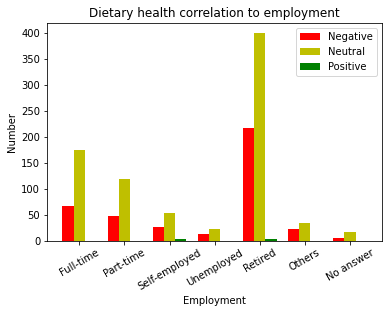

In [ ]:
N = 7
ind = np.arange(N) 
width = 0.25
  
data0 = [dietary_corr_employment[0,0],
         dietary_corr_employment[1,0],
         dietary_corr_employment[2,0],
         dietary_corr_employment[3,0],
         dietary_corr_employment[4,0],
         dietary_corr_employment[5,0],
         dietary_corr_employment[6,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [dietary_corr_employment[0,1],
         dietary_corr_employment[1,1], 
         dietary_corr_employment[2,1],
         dietary_corr_employment[3,1],
         dietary_corr_employment[4,1],
         dietary_corr_employment[5,1],
         dietary_corr_employment[6,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [dietary_corr_employment[0,2], 
         dietary_corr_employment[1,2], 
         dietary_corr_employment[2,2], 
         dietary_corr_employment[3,2],
         dietary_corr_employment[4,2],
         dietary_corr_employment[5,2],
         dietary_corr_employment[6,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'g')
  
plt.xlabel("Employment")
plt.ylabel('Number')
plt.title("Dietary health correlation to employment")
  
plt.xticks(ind+width,['Full-time', 'Part-time','Self-employed','Unemployed','Retired','Others', 'No answer'])
plt.xticks(rotation = 30)
plt.legend( (bar1, bar2, bar3), ('Negative', 'Neutral', 'Positive') )
plt.show()

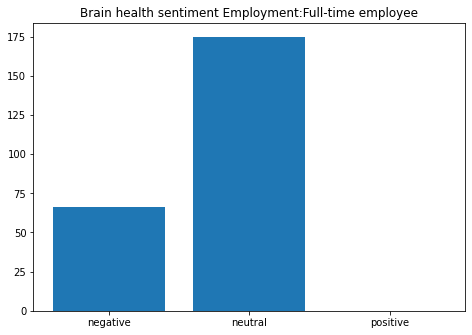

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_employment[0,0], dietary_corr_employment[0,1], dietary_corr_employment[0,2]]
plt.title('Brain health sentiment Employment:Full-time employee')
ax.bar(x,y2)
plt.show()

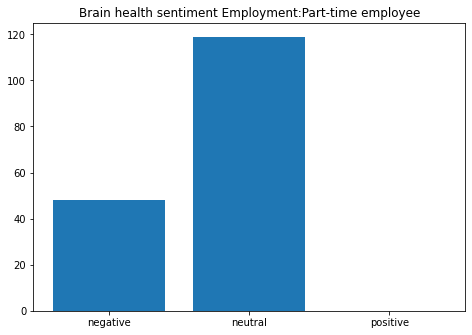

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_employment[1,0], dietary_corr_employment[1,1], dietary_corr_employment[1,2]]
plt.title('Brain health sentiment Employment:Part-time employee')
ax.bar(x,y2)
plt.show()

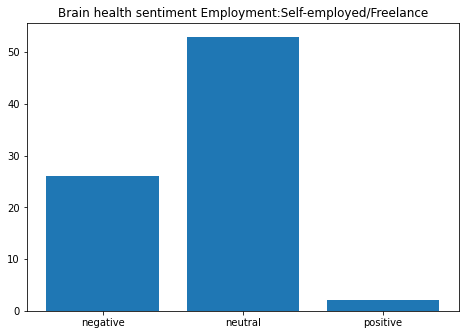

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_employment[2,0], dietary_corr_employment[2,1], dietary_corr_employment[2,2]]
plt.title('Brain health sentiment Employment:Self-employed/Freelance')
ax.bar(x,y2)
plt.show()

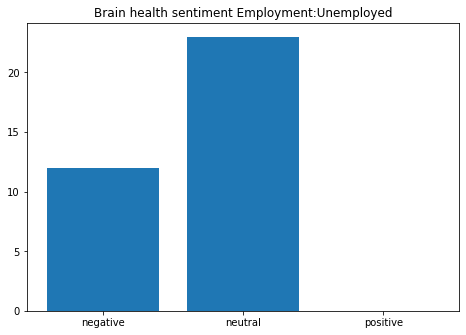

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_employment[3,0], dietary_corr_employment[3,1], dietary_corr_employment[3,2]]
plt.title('Brain health sentiment Employment:Unemployed')
ax.bar(x,y2)
plt.show()

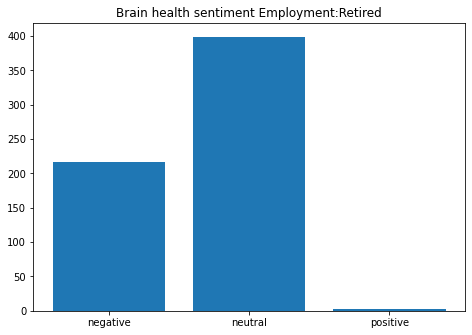

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_employment[4,0], dietary_corr_employment[4,1], dietary_corr_employment[4,2]]
plt.title('Brain health sentiment Employment:Retired')
ax.bar(x,y2)
plt.show()

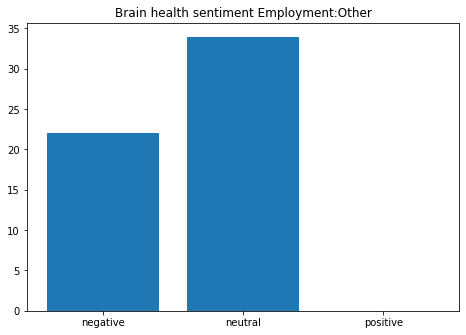

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_employment[5,0], dietary_corr_employment[5,1], dietary_corr_employment[5,2]]
plt.title('Brain health sentiment Employment:Other')
ax.bar(x,y2)
plt.show()

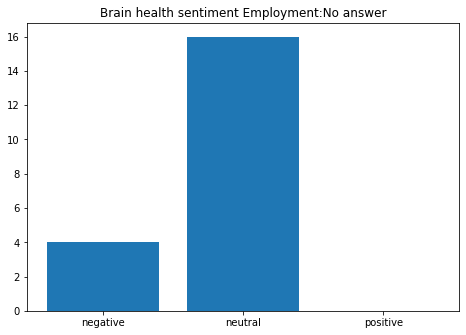

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_employment[6,0], dietary_corr_employment[6,1], dietary_corr_employment[6,2]]
plt.title('Brain health sentiment Employment:No answer')
ax.bar(x,y2)
plt.show()

#Dietary health in correlation to education

In [ ]:
datafile = open('Brain dietary.csv', 'r')
myreader = csv.reader(datafile)
dietary_corr_education = np.array([[0,0,0],
                                  [0,0,0],
                                  [0,0,0],
                                  [0,0,0],
                                  [0,0,0],
                                  [0,0,0],])

for row in myreader:
  if row[10] == '1':
    if row[23] == 'negative':
      dietary_corr_education[0,0] = dietary_corr_education[0,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_education[0,1] = dietary_corr_education[0,1]+1
    else:
      dietary_corr_education[0,2] = dietary_corr_education[0,2]+1
  if row[10] == '2':
    if row[23] == 'negative':
      dietary_corr_education[1,0] = dietary_corr_education[1,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_education[1,1] = dietary_corr_education[1,1]+1
    else:
      dietary_corr_education[1,2] = dietary_corr_education[1,2]+1
  if row[10] == '3':
    if row[23] == 'negative':
      dietary_corr_education[2,0] = dietary_corr_education[2,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_education[2,1] = dietary_corr_education[2,1]+1
    else:
      dietary_corr_education[2,2] = dietary_corr_education[2,2]+1
  if row[10] == '4':
    if row[23] == 'negative':
      dietary_corr_education[3,0] = dietary_corr_education[3,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_education[3,1] = dietary_corr_education[3,1]+1
    else:
      dietary_corr_education[3,2] = dietary_corr_education[3,2]+1
  if row[10] == '5':
    if row[23] == 'negative':
      dietary_corr_education[4,0] = dietary_corr_education[4,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_education[4,1] = dietary_corr_education[4,1]+1
    else:
      dietary_corr_education[4,2] = dietary_corr_education[4,2]+1
  if row[10] == '6' or row[10] =='0':
    if row[23] == 'negative':
      dietary_corr_education[5,0] = dietary_corr_education[5,0]+1
    elif row[23] == 'neutral':         
      dietary_corr_education[5,1] = dietary_corr_education[5,1]+1
    else:
      dietary_corr_education[5,2] = dietary_corr_education[5,2]+1

print(dietary_corr_education)

[[158 317   2]
 [ 52  99   0]
 [ 67 142   0]
 [ 84 205   1]
 [  0   0   0]
 [ 33  56   1]]


##Plot

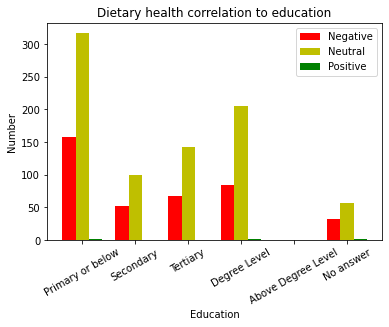

In [ ]:
N = 6
ind = np.arange(N) 
width = 0.25
  
data0 = [dietary_corr_education[0,0],
         dietary_corr_education[1,0],
         dietary_corr_education[2,0],
         dietary_corr_education[3,0],
         dietary_corr_education[4,0],
         dietary_corr_education[5,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [dietary_corr_education[0,1],
         dietary_corr_education[1,1], 
         dietary_corr_education[2,1],
         dietary_corr_education[3,1],
         dietary_corr_education[4,1],
         dietary_corr_education[5,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [dietary_corr_education[0,2], 
         dietary_corr_education[1,2], 
         dietary_corr_education[2,2], 
         dietary_corr_education[3,2], 
         dietary_corr_education[4,2],
         dietary_corr_education[5,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'g')
  
plt.xlabel("Education")
plt.ylabel('Number')
plt.title("Dietary health correlation to education")
  
plt.xticks(ind+width,['Primary or below','Secondary','Tertiary','Degree Level', 'Above Degree Level','No answer'], rotation=30)
plt.legend( (bar1, bar2, bar3), ('Negative', 'Neutral', 'Positive') )
plt.show()

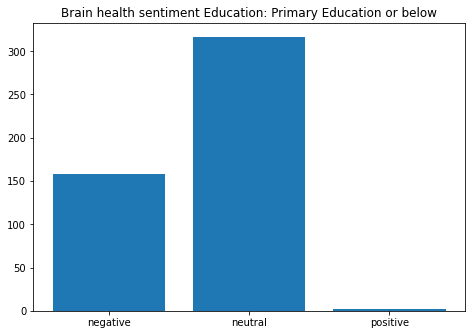

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_education[0,0], dietary_corr_education[0,1], dietary_corr_education[0,2]]
plt.title('Brain health sentiment Education: Primary Education or below')
ax.bar(x,y2)
plt.show()

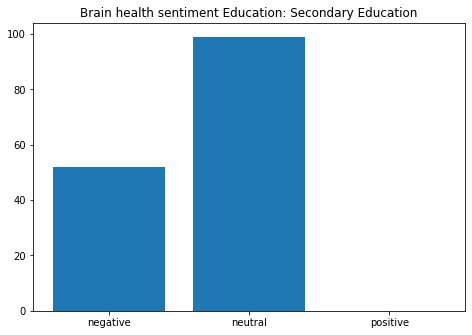

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_education[1,0], dietary_corr_education[1,1], dietary_corr_education[1,2]]
plt.title('Brain health sentiment Education: Secondary Education')
ax.bar(x,y2)
plt.show()

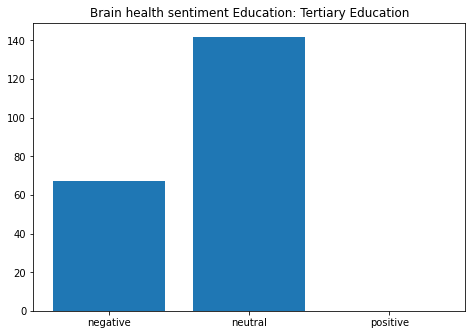

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_education[2,0], dietary_corr_education[2,1], dietary_corr_education[2,2]]
plt.title('Brain health sentiment Education: Tertiary Education')
ax.bar(x,y2)
plt.show()

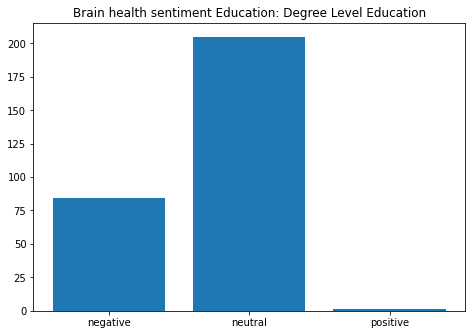

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_education[3,0], dietary_corr_education[3,1], dietary_corr_education[3,2]]
plt.title('Brain health sentiment Education: Degree Level Education')
ax.bar(x,y2)
plt.show()

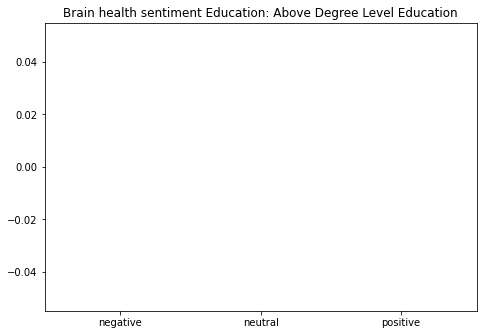

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_education[4,0], dietary_corr_education[4,1], dietary_corr_education[4,2]]
plt.title('Brain health sentiment Education: Above Degree Level Education')
ax.bar(x,y2)
plt.show()

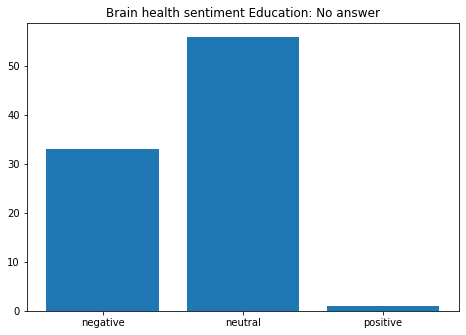

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['negative', 'neutral', 'positive']
y2 = [dietary_corr_education[5,0], dietary_corr_education[5,1], dietary_corr_education[5,2]]
plt.title('Brain health sentiment Education: No answer')
ax.bar(x,y2)
plt.show()

#__________________________

#Correlation Coefficient Between Brain health sentiment and dietary health sentiment

In [ ]:
from scipy.stats import pearsonr
brain = ([955,156,13])
dietary = ([394,819,4])
# Calculate Pearson's correlation
corr, _ = pearsonr(brain, dietary)
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.116


In [ ]:
#checking using different method
np.corrcoef(brain,dietary)

array([[1.        , 0.11626401],
       [0.11626401, 1.        ]])

The result of 0.116 shows that there is little to no correlation between brain health sentiment and dietary health sentiment